# Link prediction models using subgraph sketching using GRAPE
In this tutorial, we will dive into the exciting world of subgraph sketching as a method to compute edge embeddings in graphs. As usual, we will use the brand new high performance implementation of HyperSketching available from the [GRAPE library](https://github.com/AnacletoLAB/grape), a powerful Rust library with Python bindings.

We will use the Scikit-Learn models seamlessly integrated with GRAPE to obtain rather accurate edge predictions. 

[We will also make use of HyperLogLog counters, you can learn more about them here.](https://github.com/LucaCappelletti94/hyperloglog-rs)

[The features described in this tutorial were originally introduced in the "graph neural networks for link prediction with subgraph sketching" paper](https://openreview.net/pdf?id=m1oqEOAozQU).

[❤️ Consider supporting my work on open-source Graph Machine Learning on GitHub ❤️](https://github.com/sponsors/LucaCappelletti94)

## Why should I care about graphs?
Graphs are a fundamental data structure that can model complex relationships and interactions between entities. They are widely used in various domains, including social networks, biological networks, recommendation systems, and knowledge graphs. Understanding graphs and their properties is crucial for extracting valuable insights and making informed decisions in these domains.

Here are some reasons why you should care about graphs:

* **Representation of Relationships**: Graphs provide a natural way to represent and analyze relationships between entities. Whether it's the connections between individuals in a social network, the interactions between proteins in a biological network, or the recommendations between users and items in a recommendation system, graphs offer an intuitive and flexible representation.

* **Structural Analysis**: Graphs allow us to study the structural properties of complex systems. By analyzing the connectivity patterns, node centrality, community structure, and other graph characteristics, we can gain insights into the organization, behavior, and functioning of the underlying system. This structural analysis can reveal hidden patterns, identify key nodes or communities, and uncover important properties of the network.

* **Link Prediction**: Link prediction, or edge prediction, is a critical task in graph analysis. It involves predicting missing or future connections between nodes in a graph. This task has numerous applications, such as recommender systems, social network analysis, and drug-target interaction prediction. By accurately predicting links, we can uncover new relationships, improve system performance, and make personalized recommendations.

* **Inference and Reasoning**: Graphs enable us to perform inference and reasoning tasks. By leveraging the connections and dependencies between nodes, we can infer missing information, perform semantic reasoning, and make logical deductions. This ability to reason over graph structures is particularly valuable in knowledge graphs, where complex relationships and ontologies need to be navigated to answer queries and derive new knowledge.

* **Visualization and Communication**: Graphs offer a visual representation that can simplify complex data and aid in understanding. Visualizing graphs allows us to grasp the overall structure, identify patterns, and communicate information effectively. Graph visualizations are used in various domains, including social network analysis, fraud detection, and network security, to provide actionable insights and facilitate decision-making.

In summary, graphs are a powerful tool for modeling, analyzing, and understanding complex systems with interconnected entities. They enable us to uncover hidden relationships, predict missing connections, perform reasoning tasks, and visualize data. By exploring graphs and their properties, we can gain valuable insights and leverage them to solve real-world problems effectively.


## What is a link prediction or edge prediction task?
Link prediction, also known as edge prediction, is a fundamental task in graph analysis that aims to predict missing or future connections between nodes in a graph. It involves estimating the likelihood of the existence or formation of an edge between two nodes based on the information available from the graph's structure and attributes.

The link prediction task is motivated by the fact that real-world graphs are often incomplete or dynamically evolving. There may be edges missing from the observed graph due to various reasons such as data collection limitations, privacy concerns, or the graph's inherent incompleteness. Link prediction algorithms strive to infer these missing edges and provide insights into the underlying connections.

Additionally, link prediction can be used to forecast future relationships in evolving graphs. By leveraging the historical information and patterns encoded in the graph, we can make predictions about potential future edges. This has applications in predicting future interactions in social networks, anticipating potential collaborations in research networks, or estimating future links in recommendation systems.

Link prediction algorithms typically leverage the graph's structural properties, such as node proximity, neighborhood information, or graph motifs, to infer the likelihood of a connection. They also consider attributes associated with nodes or edges, such as node features, edge weights, or temporal information, to capture additional context for prediction.

The output of a link prediction algorithm is a prediction score or probability that quantifies the likelihood of an edge's existence between two nodes. Higher scores indicate a higher probability of a connection, while lower scores suggest a lower likelihood.

Link prediction has numerous applications across various domains. For example:

* In social network analysis, link prediction can help identify potential friendships, collaborations, or interactions between individuals. It enables targeted marketing, community detection, and recommendation of new connections to users.

* In biological networks, link prediction can aid in predicting protein-protein interactions, genetic interactions, or drug-target interactions. It helps in understanding disease mechanisms, drug discovery, and personalized medicine.

* In recommendation systems, link prediction can assist in suggesting relevant items to users based on their past preferences or similarities with other users. It improves the accuracy of recommendations and enhances user satisfaction.

In this tutorial, we will explore how subgraph sketching, in combination with Scikit-Learn models integrated with the GRAPE library, can be leveraged to tackle the link prediction task effectively. We will learn how to extract meaningful features from the graph, train machine learning models, and predict missing or future edges to enhance our understanding of graph structures.

## What is an embedding?
In the context of graph analysis, an embedding refers to a mathematical representation of nodes or edges in a graph as continuous vectors in a high-dimensional space. The process of embedding aims to capture the structural and relational information of the graph entities in a more compact and meaningful form.

By transforming nodes or edges into continuous vectors, embeddings enable us to apply various machine learning and data mining techniques that operate on numerical data. These techniques can then be used for various downstream tasks, such as link prediction, node classification, community detection, and visualization.

Embeddings are designed to preserve certain properties or characteristics of the original graph, such as node proximity, community structure, and graph topology. Nodes or edges that share similar properties in the graph tend to have similar vector representations in the embedding space. This similarity property allows us to perform tasks such as similarity search, clustering, or recommendation based on the learned embeddings.

There are different types of embeddings used in graph analysis, including node embeddings and edge embeddings. Node embeddings represent individual nodes in the graph, capturing their neighborhood information and structural properties. On the other hand, edge embeddings focus on capturing the characteristics and features of the connections between pairs of nodes.

### What is an edge embedding?
An edge embedding specifically aims to capture the properties and characteristics of the connections (edges) between pairs of nodes in a graph. It represents the relationship between two nodes in a continuous vector format, enabling us to perform various tasks related to edge prediction, edge classification, and link analysis.

An edge embedding encodes the information about the neighborhood, shared neighbors, or structural patterns associated with a particular edge. It captures the similarities or dissimilarities between different edge types or the likelihood of a connection between nodes.

Edge embeddings can be learned using various techniques, including graph neural networks (GNNs), matrix factorization methods, random walk-based approaches, and subgraph-based methods. These techniques aim to extract meaningful features from the graph structure and attributes to represent the edges effectively.

Once we have computed edge embeddings, they can be utilized as input features for machine learning models, such as classification algorithms or regression models. These models can then leverage the learned edge representations to make predictions about the existence or properties of new edges in the graph.

In this tutorial, we will focus on subgraph sketching as a method to compute edge embeddings. By extracting concise summaries or sketches of the local structural information around each edge, we can effectively capture the key features necessary for accurate edge prediction.

## What is GRAPE?
[🍇🍇 GRAPE 🍇🍇](https://github.com/AnacletoLAB/grape) is a graph processing and embedding library that enables users to easily manipulate and analyze graphs. With [GRAPE](https://github.com/AnacletoLAB/grape), users can efficiently load and preprocess graphs, generate random walks, and apply various node and edge embedding models. Additionally, [GRAPE](https://github.com/AnacletoLAB/grape) provides a fair and reproducible evaluation pipeline for comparing different graph embedding and graph-based prediction methods.

![features in GRAPE](https://github.com/AnacletoLAB/grape/raw/main/images/sequence_diagram.png?raw=true)

## What are subgraph sketches?
Subgraph sketches are compact representations of the local structural information surrounding each edge in a graph. They provide a summarized view of the subgraph within a specified radius or number of hops from an edge, capturing the essential features necessary for link prediction tasks.

Instead of considering the entire graph, subgraph sketches focus on extracting relevant information from the immediate neighborhood of each edge. 

Our sketches will be defined by the approximated intersection cardinality of nodes neighbours at different hop distance. To implement the approximated intersection efficiently and at scale, we make use of [HyperLogLog counters](https://github.com/LucaCappelletti94/hyperloglog-rs).

### HyperLogLog counters
[HyperLogLog counters](https://github.com/LucaCappelletti94/hyperloglog-rs) are a probabilistic data structure used to estimate the cardinality, or the number of unique elements, in a set. They are particularly useful for subgraph sketching as they provide an efficient way to estimate the number of unique nodes or edges within a certain radius or number of hops from an edge.

HyperLogLog counters work by hashing the elements of the set and maintaining a compact representation of the hashed values. These counters utilize a limited amount of memory while providing accurate estimates of the cardinality. The very bare minimum amount of memory that [the implementation I developed supports](https://github.com/LucaCappelletti94/hyperloglog-rs) is just 9 bytes per node, using four bits per register, and precision four (which means just 16 registers).

In the context of subgraph sketching, HyperLogLog counters can be employed to approximate the number of unique nodes or edges encountered within a specific neighborhood around each edge. Once the hyperloglog counters for all nodes and for the desired number of hops are ready, the computation of the intersections happens in constant time.


#### Union Operation with HyperLogLog Counters
One of the key strengths of HyperLogLog counters is their ability to efficiently estimate set unions. In the context of subgraph sketching, where we are using HyperLogLog counters, we can leverage this capability to compute the union of sets represented by the counters.

The union operation with HyperLogLog counters involves combining the counters from multiple sets to obtain an estimate of the cardinality of their union. When merging two HyperLogLog counters, the maximum value of each register is taken from the corresponding registers of the counters being merged. This process ensures that the merged counter captures the maximum unique elements from both sets, resulting in an approximation of the union cardinality.

It's important to note that the accuracy of the estimated union cardinality using HyperLogLog counters depends on the precision of the counters and the characteristics of the sets being approximated. While HyperLogLog counters offer efficient and scalable estimates, they are probabilistic data structures, and the results may have some degree of error, generally within a few percentage points.

In the context of subgraph sketching, the union operation with HyperLogLog counters enables us to efficiently estimate the sizes of the neighborhood sets, capturing the unique elements within a specified neighborhood radius. These estimates are then used to compute the subgraph sketch, which summarizes the local structural information around each edge for link prediction tasks.

#### Intersection Cardinality with HyperLogLog Counters
HyperLogLog counters are powerful tools for estimating the cardinality of sets using probabilistic techniques. While HyperLogLog counters excel at estimating set unions, estimating the intersection cardinality directly using HyperLogLog counters is not straightforward. However, by leveraging the estimated cardinalities of the original sets and their union, we can approximate the intersection cardinality using set theory formulas.

![intersection from union](https://github.com/LucaCappelletti94/hyperloglog-rs/blob/main/intersection.jpg?raw=true)

It's worth noting that in the original work on subgraph sketching, the authors also employed another technique called MinHash to compute the intersection cardinality. MinHash is a probabilistic data structure commonly used for estimating set intersections. However, in the context of subgraph sketching, where HyperLogLog counters are already being used, the additional use of MinHash is unnecessary.

To estimate the intersection cardinality, we can utilize the inclusion-exclusion principle. Consider two sets, A and B, with estimated cardinalities of $|A|$ and $|B|$, respectively, and an estimated cardinality of their union, $|A \cup B|$. The intersection cardinality, $|A \cap B|$, can be calculated as:

$$|A \cap B| = |A| + |B| - |A \cup B|$$

By substituting the estimated cardinalities obtained from the HyperLogLog counters, we can approximate the intersection cardinality. This approach provides a useful estimation of the common elements or relationships between nodes within a specified neighborhood radius, without the need for additional techniques, and therefore additional memory requirements, like MinHash.

It's important to keep in mind that the estimated intersection cardinality may have some degree of error due to the probabilistic nature of HyperLogLog counters. The accuracy of the estimation depends on factors such as the precision of the counters and the characteristics of the sets being approximated. However, in many practical scenarios, the approximation is sufficiently accurate for meaningful analysis and computations, as we mentioned before the error is usually within a few percentage points.

In summary, while MinHash is commonly used to estimate set intersections, in the context of subgraph sketching using HyperLogLog counters, the additional use of MinHash is not necessary. The inclusion-exclusion principle, combined with the estimated cardinalities of the original sets and their union obtained from HyperLogLog counters, allows us to approximate the intersection cardinality effectively. This approach simplifies the computation pipeline and leverages the capabilities of HyperLogLog counters to estimate both set unions and intersections within subgraph sketching frameworks.

### Example: sketching with 2 hops
To illustrate the concept of subgraph sketching with a specific radius, let's consider an example where we aim to compute subgraph sketches with 2 hops from each edge.

![2-hops graph sketching](https://github.com/LucaCappelletti94/hyperloglog-rs/blob/main/tuple_overlap.png?raw=true)

For a given tuple, we allocate two HyperLogLog counters per node. We populate the counters with the first-order and second-order neighbours of each node. By computing the exclusive intersections, represented by the $A$ matrix and the $B$ and $C$ vectors, we obtain a total of 4 + 2 + 2 features representing the local sketch.

By repeating this process for all edges in the graph, we build subgraph sketches that summarize the structural properties of the immediate 2-hop neighborhood around each edge. These sketches can be stored as features and utilized in link prediction tasks, but is best to compute them lazily as need be to avoid excessive memory requirements.

### Example: sketching with 3 hops
Extending the concept further, let's consider an example of subgraph sketching with a 3-hop radius.

![3-hops graph sketching](https://github.com/LucaCappelletti94/hyperloglog-rs/blob/main/triple_overlap.png?raw=true)

Similar to the previous example, we take each edge in the graph and consider the connected nodes as the center. We then explore the neighboring nodes within 3 hops from each center node. HyperLogLog counters are incremented for each encountered node, capturing the unique nodes in the extended neighborhood.

As before, we obtain an $A$ matrix, containing the exclusive overlaps, and the $B$ and $C$ vectors, containing the exclusive differences. Now the $A$ matrix has shape 3x3, and the vectors have 3 features each.

By applying this process to all edges in the graph, we construct subgraph sketches that provide a summarized view of the local 3-hop structural information surrounding each edge. These sketches serve as informative features for link prediction tasks, enabling accurate predictions based on the extended neighborhood information.

Subgraph sketching with varying radii or number of hops allows us to control the level of detail and context we want to capture for edge embeddings. It strikes a balance between computational efficiency and the ability to capture relevant information for accurate link prediction.

## Scikit-Learn models
[Scikit-Learn](https://scikit-learn.org/stable/) is a popular machine learning library in Python that provides a wide range of algorithms and tools for various tasks. In this section, we will explore how different Scikit-Learn models can be utilized for link prediction tasks using subgraph sketches.

### Decision tree
[Decision trees](https://scikit-learn.org/stable/modules/tree.html) are versatile models that can be used for both classification and regression tasks. They partition the feature space based on the values of input features, creating a hierarchical structure of decision nodes and leaf nodes. Decision trees make predictions by traversing the tree from the root node to the appropriate leaf node based on the feature values.

In the context of link prediction, decision trees can be trained using subgraph sketch features as input. They can learn the patterns and relationships present in the subgraph sketches and make predictions about the existence or properties of edges in the graph.

### Random forests
[Random forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) are an ensemble learning method that combines multiple decision trees to improve prediction accuracy and reduce overfitting. In a random forest, each tree is trained on a random subset of the training data and a random subset of features. The final prediction is made by aggregating the predictions of all individual trees.

Random forests are well-suited for link prediction tasks as they can capture complex relationships and interactions between features. By utilizing subgraph sketch features, random forests can effectively learn from the structural information encoded in the sketches and make accurate predictions about edge existence or properties.

### Extra trees
[Extra Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) are another ensemble learning method similar to random forests. It builds multiple decision trees using random splits and feature subsets, but with a difference. In extra trees, the splitting thresholds for each feature are selected randomly, without considering the optimal splitting points.

Like random forests, extra trees are suitable for link prediction tasks. They can exploit the subgraph sketch features to capture the important structural patterns and make predictions about edges in the graph.

### Gradient boosting
[Gradient boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) is an ensemble learning technique that combines multiple weak prediction models, typically decision trees, to create a strong predictive model. It builds the model in a stage-wise manner, where each new model is trained to correct the mistakes of the previous models. The final prediction is made by aggregating the predictions of all models.

Gradient boosting is a powerful approach for link prediction as it can capture complex relationships and dependencies in the data. By using subgraph sketch features as input, gradient boosting algorithms can learn from the structural information and make accurate predictions about edge existence or properties.

###  Multi-Layer Perceptron (MLP)
[Multi-Layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) (MLP) is a type of artificial neural network that consists of multiple layers of interconnected nodes, or neurons. Each neuron applies an activation function to the weighted sum of its inputs, allowing the network to learn complex nonlinear relationships in the data.

MLP models can be applied to link prediction tasks by training them on subgraph sketch features. By leveraging the nonlinearity and expressive power of MLPs, they can capture intricate patterns and relationships present in the subgraph sketches and make predictions about edges in the graph.

In this tutorial, we will explore how to leverage these Scikit-Learn models, such as decision trees, random forests, extra trees, gradient boosting, and MLP, in combination with subgraph sketches computed using GRAPE. By integrating these models with the informative subgraph sketch features, we can enhance our link prediction capabilities and gain insights into the underlying graph structures.

## Datasets
In this tutorial, we will work with two protein-protein interaction (PPI) datasets from the [STRING database](https://string-db.org/): STRING PPI Homo Sapiens and STRING PPI Mus Musculus. These datasets provide valuable information about the interactions between proteins in different organisms.

### STRING PPI Homo Sapiens
The STRING PPI Homo Sapiens dataset contains protein-protein interaction information specifically for the Homo Sapiens species (human). It includes a comprehensive collection of known and predicted protein interactions, gathered from various sources such as experimental studies, text mining, and computational predictions.

This dataset provides a rich resource for studying the protein interaction network of human cells. It allows us to analyze the relationships between different proteins, explore protein complexes, and gain insights into the functional modules within the cell.

The STRING PPI Homo Sapiens dataset is typically represented as an edge list or an adjacency matrix, where each row and column represents a protein, and the entries indicate the presence or absence of interactions between proteins.

### STRING PPI Mus Musculus
The STRING PPI Mus Musculus dataset contains protein-protein interaction information for the Mus Musculus species (mouse). Similar to the Homo Sapiens dataset, it provides a comprehensive collection of known and predicted protein interactions specific to mice.

The STRING PPI Mus Musculus dataset is valuable for studying protein interaction networks in mouse models. It allows us to investigate the molecular mechanisms, pathways, and functions associated with proteins in mice.

Like the Homo Sapiens dataset, the STRING PPI Mus Musculus dataset is commonly represented as an edge list or an adjacency matrix, where each row and column corresponds to a protein, and the entries indicate the presence or absence of interactions between proteins.

In this tutorial, we will utilize these datasets to demonstrate the application of subgraph sketching with GRAPE and Scikit-Learn models for link prediction. We will preprocess the data, extract subgraph sketches, and train machine learning models to predict missing or future edges in the protein-protein interaction networks of Homo Sapiens and Mus Musculus species.


# Experiments
In this section, we will conduct a series of experiments to showcase the effectiveness of subgraph sketching with GRAPE and Scikit-Learn models for edge prediction tasks. The experiments will include dataset retrieval and filtering, graph reporting, graph visualization using the GRAPE Graph Visualizer, and performance evaluation using the GRAPE edge prediction evaluation pipeline.

## Installing GRAPE
Make sure you have a recent version of GRAPE installed - if you don't have it, you can install it now from PyPi by running:

```bash
pip install grape -U
```

## Dataset retrieval and filtering
We will begin by retrieving the protein-protein interaction (PPI) datasets from the STRING database for Homo Sapiens and Mus Musculus species. These datasets contain information about protein interactions, but we will apply a filtering step to remove edges with confidence scores lower than `700`. This filtering will ensure that we focus on higher-confidence interactions for our experiments. Secondarily, we will drop all nodes that are not within the main component of the graph.

## Graph reporting
Once we have the filtered datasets, we will generate a graph report for each of the graphs. The graph report will provide insights into the basic properties of the graphs, such as the number of nodes, edges, and connected components. It will also include statistics on node degrees, topological oddities, and other relevant graph metrics.

## Graph visualization using the GRAPE Graph Visualizer
To gain a better understanding of the subgraph sketching features and their behavior, we will utilize the Graph Visualizer tool from GRAPE. This amazing tool enables us to compute t-SNE embeddings for the graphs and visualize various edge metrics. By visualizing the t-SNE embeddings, we can observe how the subgraph sketching features capture the structural patterns and relationships in the graphs.

## Performance evaluation using the GRAPE edge prediction evaluation pipeline
To evaluate the performance of different Scikit-Learn models, we will set up the edge prediction evaluation pipeline from GRAPE. This pipeline allows us to assess the predictive power of the models for edge existence or properties. We will use a connected holdout strategy, where a portion of the edges are randomly held out for testing, while the remaining edges are used for training. [You can learn more about the available graph holdouts here](https://github.com/AnacletoLAB/grape/blob/main/tutorials/Graph_holdouts_using_GRAPE.ipynb). We will perform evaluations for different numbers of hops `(2, 3, 4, 5, 6)` and fix the precision of the HyperLogLog counters at `8` with `6` bits.

By running the edge prediction evaluation pipeline for each model and analyzing the performance metrics, we can gain insights into how well the subgraph sketching features contribute to the accuracy of edge predictions.

Throughout the experiments, we will provide step-by-step instructions and code examples to guide you in implementing and replicating the experiments. The results and analysis will help us understand the effectiveness of subgraph sketching and its integration with Scikit-Learn models for edge prediction tasks.

## Installing GRAPE
The very first step, is making sure you have the GRAPE library installed:

In [1]:
!pip install grape -Uq

## Retrieving the graphs
In the following cell, we will import the two STRING PPI datasets from GRAPE and load them. Subsequently, we will apply a filtering step to remove edges with confidence scores lower than `700`. This filtering will ensure that we focus on higher-confidence interactions for our experiments. Secondarily, we will drop all nodes that are not within the main component of the graph.

In [2]:
%%time
from grape.datasets.string import HomoSapiens, MusMusculus

homo_sapiens = HomoSapiens(load_node_types=False)
mus_musculus = MusMusculus(load_node_types=False)

CPU times: user 36.3 s, sys: 4.28 s, total: 40.6 s
Wall time: 24.1 s


In [3]:
%%time
homo_sapiens = homo_sapiens.filter_from_names(min_edge_weight=700)
mus_musculus = mus_musculus.filter_from_names(min_edge_weight=700)

CPU times: user 6.94 s, sys: 16.7 ms, total: 6.96 s
Wall time: 333 ms


In [4]:
%%time
homo_sapiens = homo_sapiens.remove_components(top_k_components=1)
mus_musculus = mus_musculus.remove_components(top_k_components=1)

CPU times: user 667 ms, sys: 14.8 ms, total: 682 ms
Wall time: 51 ms


## Graph reporting
We can now generate extensive graph reports for both graphs. The graph report will provide insights into the basic properties of the graphs, such as the number of nodes, edges, and connected components. It will also include statistics on node degrees, topological oddities, and other relevant graph metrics.

Computing a graph report with GRAPE is the easiest thing - just display the graph object!

In [5]:
homo_sapiens

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>HomoSapiens</h2><p class="paragraph">The undirected graph HomoSapiens has 16.58K nodes and 252.83K edges. The graph is connected, that is, it is composed of a single connected component that includes all nodes and edges. The RAM requirements for the nodes and edges data structures are 2.36MB and 2.16MB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 1, the maximum node degree is 747, the mode degree is 1, the mean degree is 30.49 and the node degree median is 13.</p><p class="paragraph">The nodes with the highest degree centrality are 9606.ENSP00000272317 (degree 747), 9606.ENSP00000269305 (degree 723), 9606.ENSP00000388107 (degree 669), 9606.ENSP00000441543 (degree 620) and 9606.ENSP00000362680 (degree 572).</p><h3 style="margin: 1em 0 0 0;">Weights</h3><p class="paragraph">The minimum edge weight is 700, the maximum edge weight is 999 and the total edge weight is 437687676. The RAM requirement for the edge weights data structure is 2.02MB.</p><h3 style="margin: 1em 0 0 0;">Topological Oddities</h3><p class="paragraph">A topological oddity is a set of nodes in the graph that <i>may be derived</i> by an error during the generation of the edge list of the graph and, depending on the task, could bias the results of topology-based models. In the following paragraph, we will describe the detected topological oddities.</p><h4 style="margin: 1em 0 0 0;">Isomorphic node groups</h4><p class="paragraph">Isomorphic node groups are nodes with exactly the same neighbours, node types, edge types and weights (if present in the graph). Nodes in such groups are topologically indistinguishable, that is swapping their ID would not change the graph topology. We have detected  a single isomorphic node group in the graph.</p><ul class="medium-columns"><li><p class="paragraph">Group with 2 nodes (degree 16): 9606.ENSP00000478980 and 9606.ENSP00000485364.</p></li></ul><h4 style="margin: 1em 0 0 0;">Dendritic trees</h4><p class="paragraph">A dendritic tree is a tree-like structure starting from a root node that is part of another strongly connected component. We have detected 14 dendritic trees in the graph, involving a total of 61 nodes (0.37%) and 122 edges (0.02%), with the largest one involving 6 nodes and 12 edges. The detected dendritic trees, sorted by decreasing size, are:</p><ol class="large-columns"><li><p class="paragraph">Dendritic tree starting from the root node 9606.ENSP00000254627 (degree 5), and containing 6 nodes, with a maximal depth of 3, which are 9606.ENSP00000407107 (degree 5), 9606.ENSP00000266022, 9606.ENSP00000299308, 9606.ENSP00000336693 and 9606.ENSP00000391404.</p></li>
<li><p class="paragraph">Dendritic tree starting from the root node 9606.ENSP00000366542 (degree 5), and containing 6 nodes, with a maximal depth of 3, which are 9606.ENSP00000276127 (degree 3), 9606.ENSP00000281722, 9606.ENSP00000357889, 9606.ENSP00000362206 and 9606.ENSP00000306776.</p></li>
<li><p class="paragraph">Dendr

In [6]:
mus_musculus

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>MusMusculus</h2><p class="paragraph">The undirected graph MusMusculus has 16.18K nodes and 233.34K edges. The graph is connected, that is, it is composed of a single connected component that includes all nodes and edges. The RAM requirements for the nodes and edges data structures are 2.57MB and 2.00MB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 1, the maximum node degree is 684, the mode degree is 1, the mean degree is 28.84 and the node degree median is 12.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='https://string-db.org/network/10090.ENSMUSP00000099909' target='_blank' title='Go to STRING Synechocystis sp. PCC6803 to get more informations about 10090.ENSMUSP00000099909'>10090.ENSMUSP00000099909</a> (degree 684), <a href='https://string-db.org/network/10090.ENSMUSP00000104298' target='_blank' title='Go to STRING Synechocystis sp. PCC6803 to get more informations about 10090.ENSMUSP00000104298'>10090.ENSMUSP00000104298</a> (degree 649), <a href='https://string-db.org/network/10090.ENSMUSP00000007130' target='_blank' title='Go to STRING Synechocystis sp. PCC6803 to get more informations about 10090.ENSMUSP00000007130'>10090.ENSMUSP00000007130</a> (degree 585), <a href='https://string-db.org/network/10090.ENSMUSP00000029175' target='_blank' title='Go to STRING Synechocystis sp. PCC6803 to get more informations about 10090.ENSMUSP00000029175'>10090.ENSMUSP00000029175</a> (degree 538) and <a href='https://string-db.org/network/10090.ENSMUSP00000001780' target='_blank' title='Go to STRING Synechocystis sp. PCC6803 to get more informations about 10090.ENSMUSP00000001780'>10090.ENSMUSP00000001780</a> (degree 517).</p><h3 style="margin: 1em 0 0 0;">Weights</h3><p class="paragraph">The minimum edge weight is 700, the maximum edge weight is 999 and the total edge weight is 394174710. The RAM requirement for the edge weights data structure is 1.87MB.</p><h3 style="margin: 1em 0 0 0;">Topological Oddities</h3><p class="paragraph">A topological oddity is a set of nodes in the graph that <i>may be derived</i> by an error during the generation of the edge list of the graph and, depending on the task, could bias the results of topology-based models. In the following paragraph, we will describe the detected topological oddities.</p><h4 style="margin: 1em 0 0 0;">Isomorphic node groups</h4><p class="paragraph">Isomorphic node groups are nodes with exactly the same neighbours, node types, edge types and weights (if present in the graph). Nodes in such groups are topologically indistinguishable, that is swapping their ID would not change the graph topology. We have detected 5 isomorphic node groups in the graph, involving a total of 11 nodes (0.07%) and 667 edges (0.14%), with the largest one involving 3 nodes and 309 edges. The detected isomorphic node groups, sorted by decreasing size, are:</p><ol class="medium-columns"><li><p class="paragraph">Group with 3 nodes (degr

## Graph visualization using the GRAPE Graph Visualizer
We now proceed to visualize the HyperSketching edge embedding features using the Graph Visualizer tool from GRAPE. This tool enables us to compute t-SNE embeddings for the graphs and visualize various edge metrics. By visualizing the t-SNE embeddings, we can observe how the subgraph sketching features capture the structural patterns and relationships in the graphs.

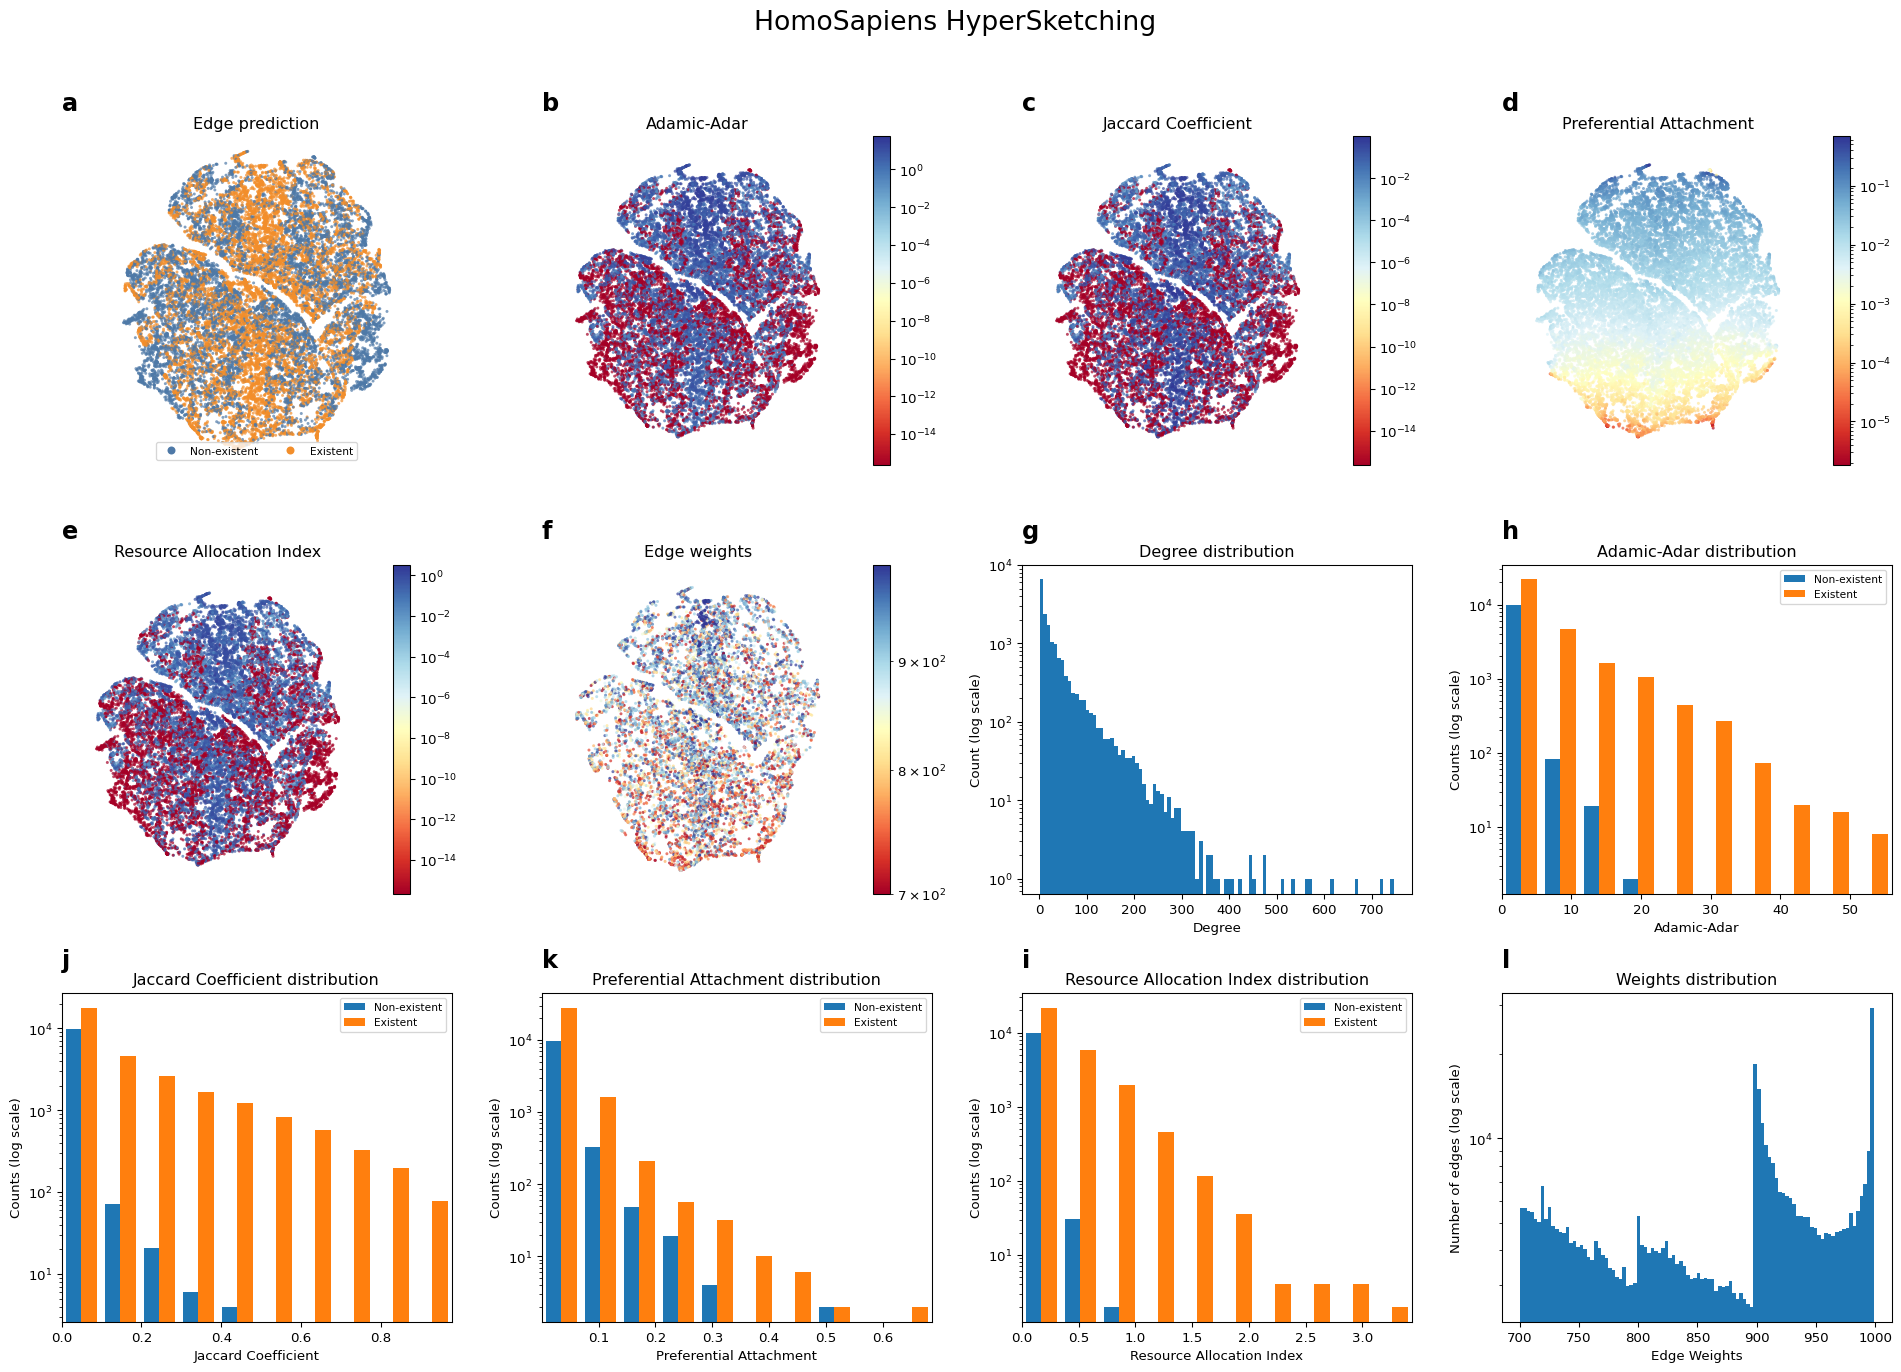

CPU times: user 2min, sys: 367 ms, total: 2min 1s
Wall time: 20.2 s


In [7]:
%%time
from grape.embedders import HyperSketching
from grape import GraphVisualizer

GraphVisualizer(homo_sapiens).fit_and_plot_all(HyperSketching(
    number_of_hops=6,
    precision=10,
    bits=6
))

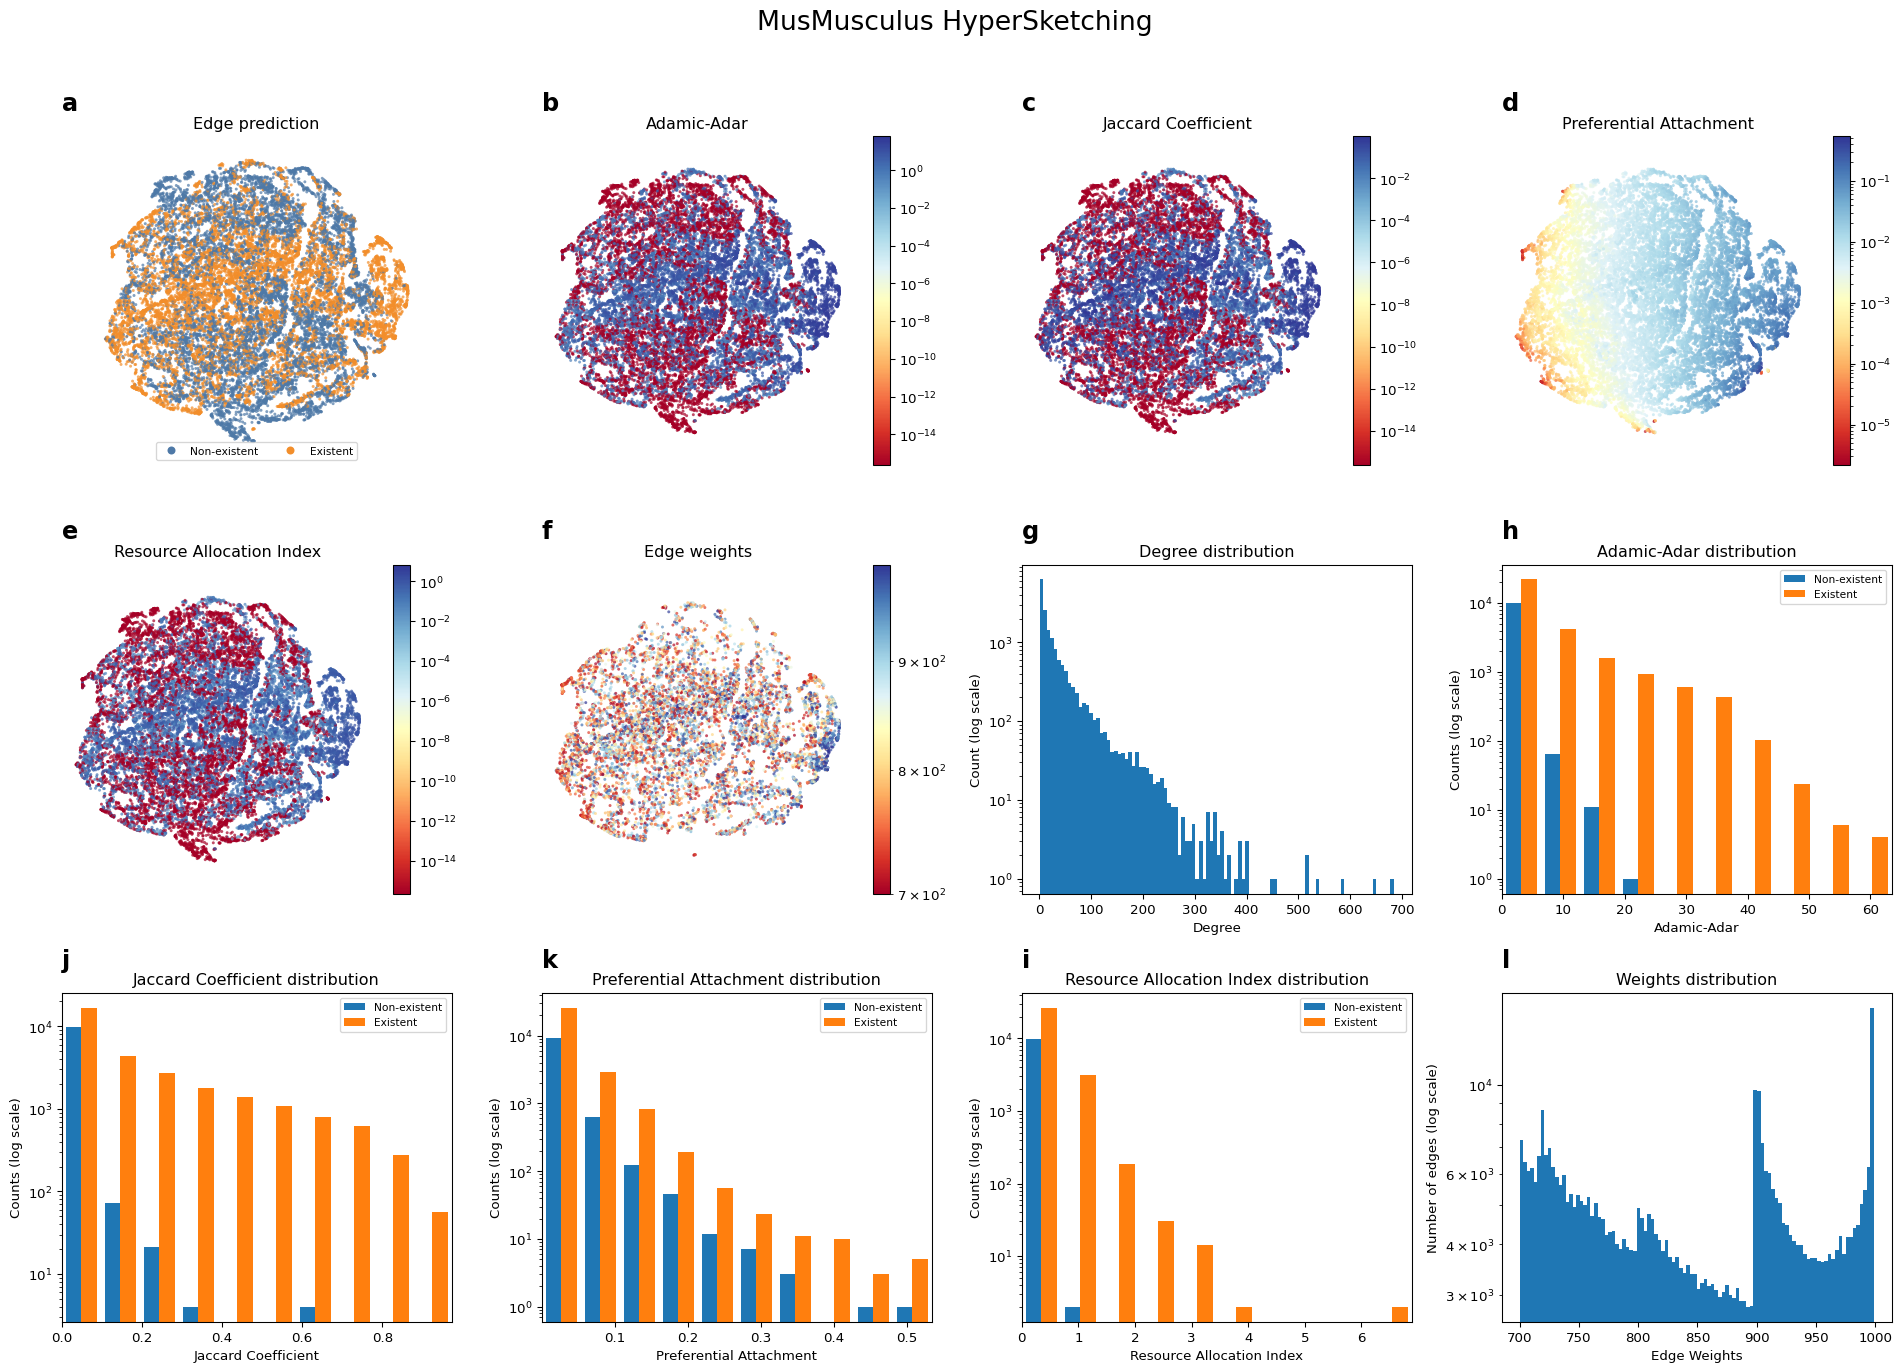

CPU times: user 2min 12s, sys: 443 ms, total: 2min 12s
Wall time: 20 s


In [8]:
%%time
from grape.embedders import HyperSketching
from grape import GraphVisualizer

GraphVisualizer(mus_musculus).fit_and_plot_all(HyperSketching(
    number_of_hops=6,
    precision=10,
    bits=6
))

## Performance evaluation using the GRAPE edge prediction evaluation pipeline
And now, for the part you all were waiting for! We will evaluate the performance of different Scikit-Learn models using the edge prediction evaluation pipeline from GRAPE.

First, we start by importing all the models we intend to evaluate and the edge prediction evaluation pipeline from GRAPE, and then we compose the pipeline. Easy as that.

In [47]:
%%time
from grape.edge_prediction import DecisionTreeEdgePrediction, RandomForestEdgePrediction, ExtraTreesEdgePrediction, MLPEdgePrediction, GradientBoostingEdgePrediction
from grape.edge_prediction import edge_prediction_evaluation
from grape.embedders import HyperSketching
from tqdm.auto import tqdm
import pandas as pd


results = pd.concat([
    edge_prediction_evaluation(
        # We use 80% of the edges for the training set
        holdouts_kwargs=dict(train_size=0.8),
        # We will be running 10 holdouts
        number_of_holdouts=10,
        # We will be using a connected monte carlo holdout:
        evaluation_schema = 'Connected Monte Carlo',
        # We will run the pipeline on the Homo Sapiens and Mus Musculus graphs
        graphs = [homo_sapiens, mus_musculus],
        # We will evaluate, separately, the following models:
        models = [
            DecisionTreeEdgePrediction(),
            RandomForestEdgePrediction(),
            ExtraTreesEdgePrediction(),
            MLPEdgePrediction(),
            GradientBoostingEdgePrediction()
        ],
        # As edge features, we will be using the HyperSketching
        edge_features=HyperSketching(
            number_of_hops=number_of_hops,
            precision=8,
            bits=6
        ),
        # We enable the cache so to store the partial results of
        # each holdouts and make re-running this Jupyter Notebook faster
        enable_cache = True,
    )
    for number_of_hops in tqdm((2, 3, 4, 5, 6), desc="Number of hops", leave=False, dynamic_ncols=True)
])

results

Number of hops:   0%|                                                                                         …

Graphs:   0%|                                                                                                 …

Graphs:   0%|                                                                                                 …

Graphs:   0%|                                                                                                 …

Graphs:   0%|                                                                                                 …

Graphs:   0%|                                                                                                 …

CPU times: user 857 ms, sys: 32.1 ms, total: 890 ms
Wall time: 882 ms


,evaluation_mode,train_size,validation_unbalance_rate,use_scale_free_distribution,validation_sample_only_edges_with_heterogeneous_node_types,specificity,diagnostic_odds_ratio,balanced_accuracy,false_omission_rate,informedness,...,"(model_parameters, early_stopping)","(model_parameters, validation_fraction)","(model_parameters, beta_1)","(model_parameters, beta_2)","(model_parameters, epsilon)","(model_parameters, n_iter_no_change)","(model_parameters, max_fun)","(model_parameters, loss)","(model_parameters, init)","(model_parameters, subsample)"
0,train,0.799998,1.0,True,False,0.995518,2.042007e+06,0.997705,0.000109,0.995410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,test,0.799998,1.0,True,False,0.995768,6.578312e+01,0.607130,0.439722,0.214260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,train,0.799998,1.0,True,False,0.995491,inf,0.997746,0.000000,0.995491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,test,0.799998,1.0,True,False,0.995768,6.584789e+01,0.607214,0.439669,0.214428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,train,0.799998,1.0,True,False,0.964727,9.217362e+04,0.982215,0.000307,0.964431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,test,0.800000,1.0,True,False,0.959640,7.497571e+01,0.859433,0.200577,0.718865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,train,0.800000,1.0,True,False,0.995465,inf,0.997733,0.000000,0.995465,...,False,0.1,0.9,0.999,1.000000e-08,10.0,15000.0,NaN,NaN,NaN
1,test,0.800000,1.0,True,False,0.995714,9.157836e+01,0.639217,0.418729,0.278435,...,False,0.1,0.9,0.999,1.000000e-08,10.0,15000.0,NaN,NaN,NaN
0,train,0.800000,1.0,True,False,0.996255,inf,0.998128,0.000000,0.996255,...,NaN,0.1,NaN,NaN,NaN,NaN,NaN,log_loss,NaN,1.0


We can visualize the results by simply running the [barplots python package](https://github.com/LucaCappelletti94/barplots):

/home/luca/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


Rendering barplots:   0%|                                                                                     …

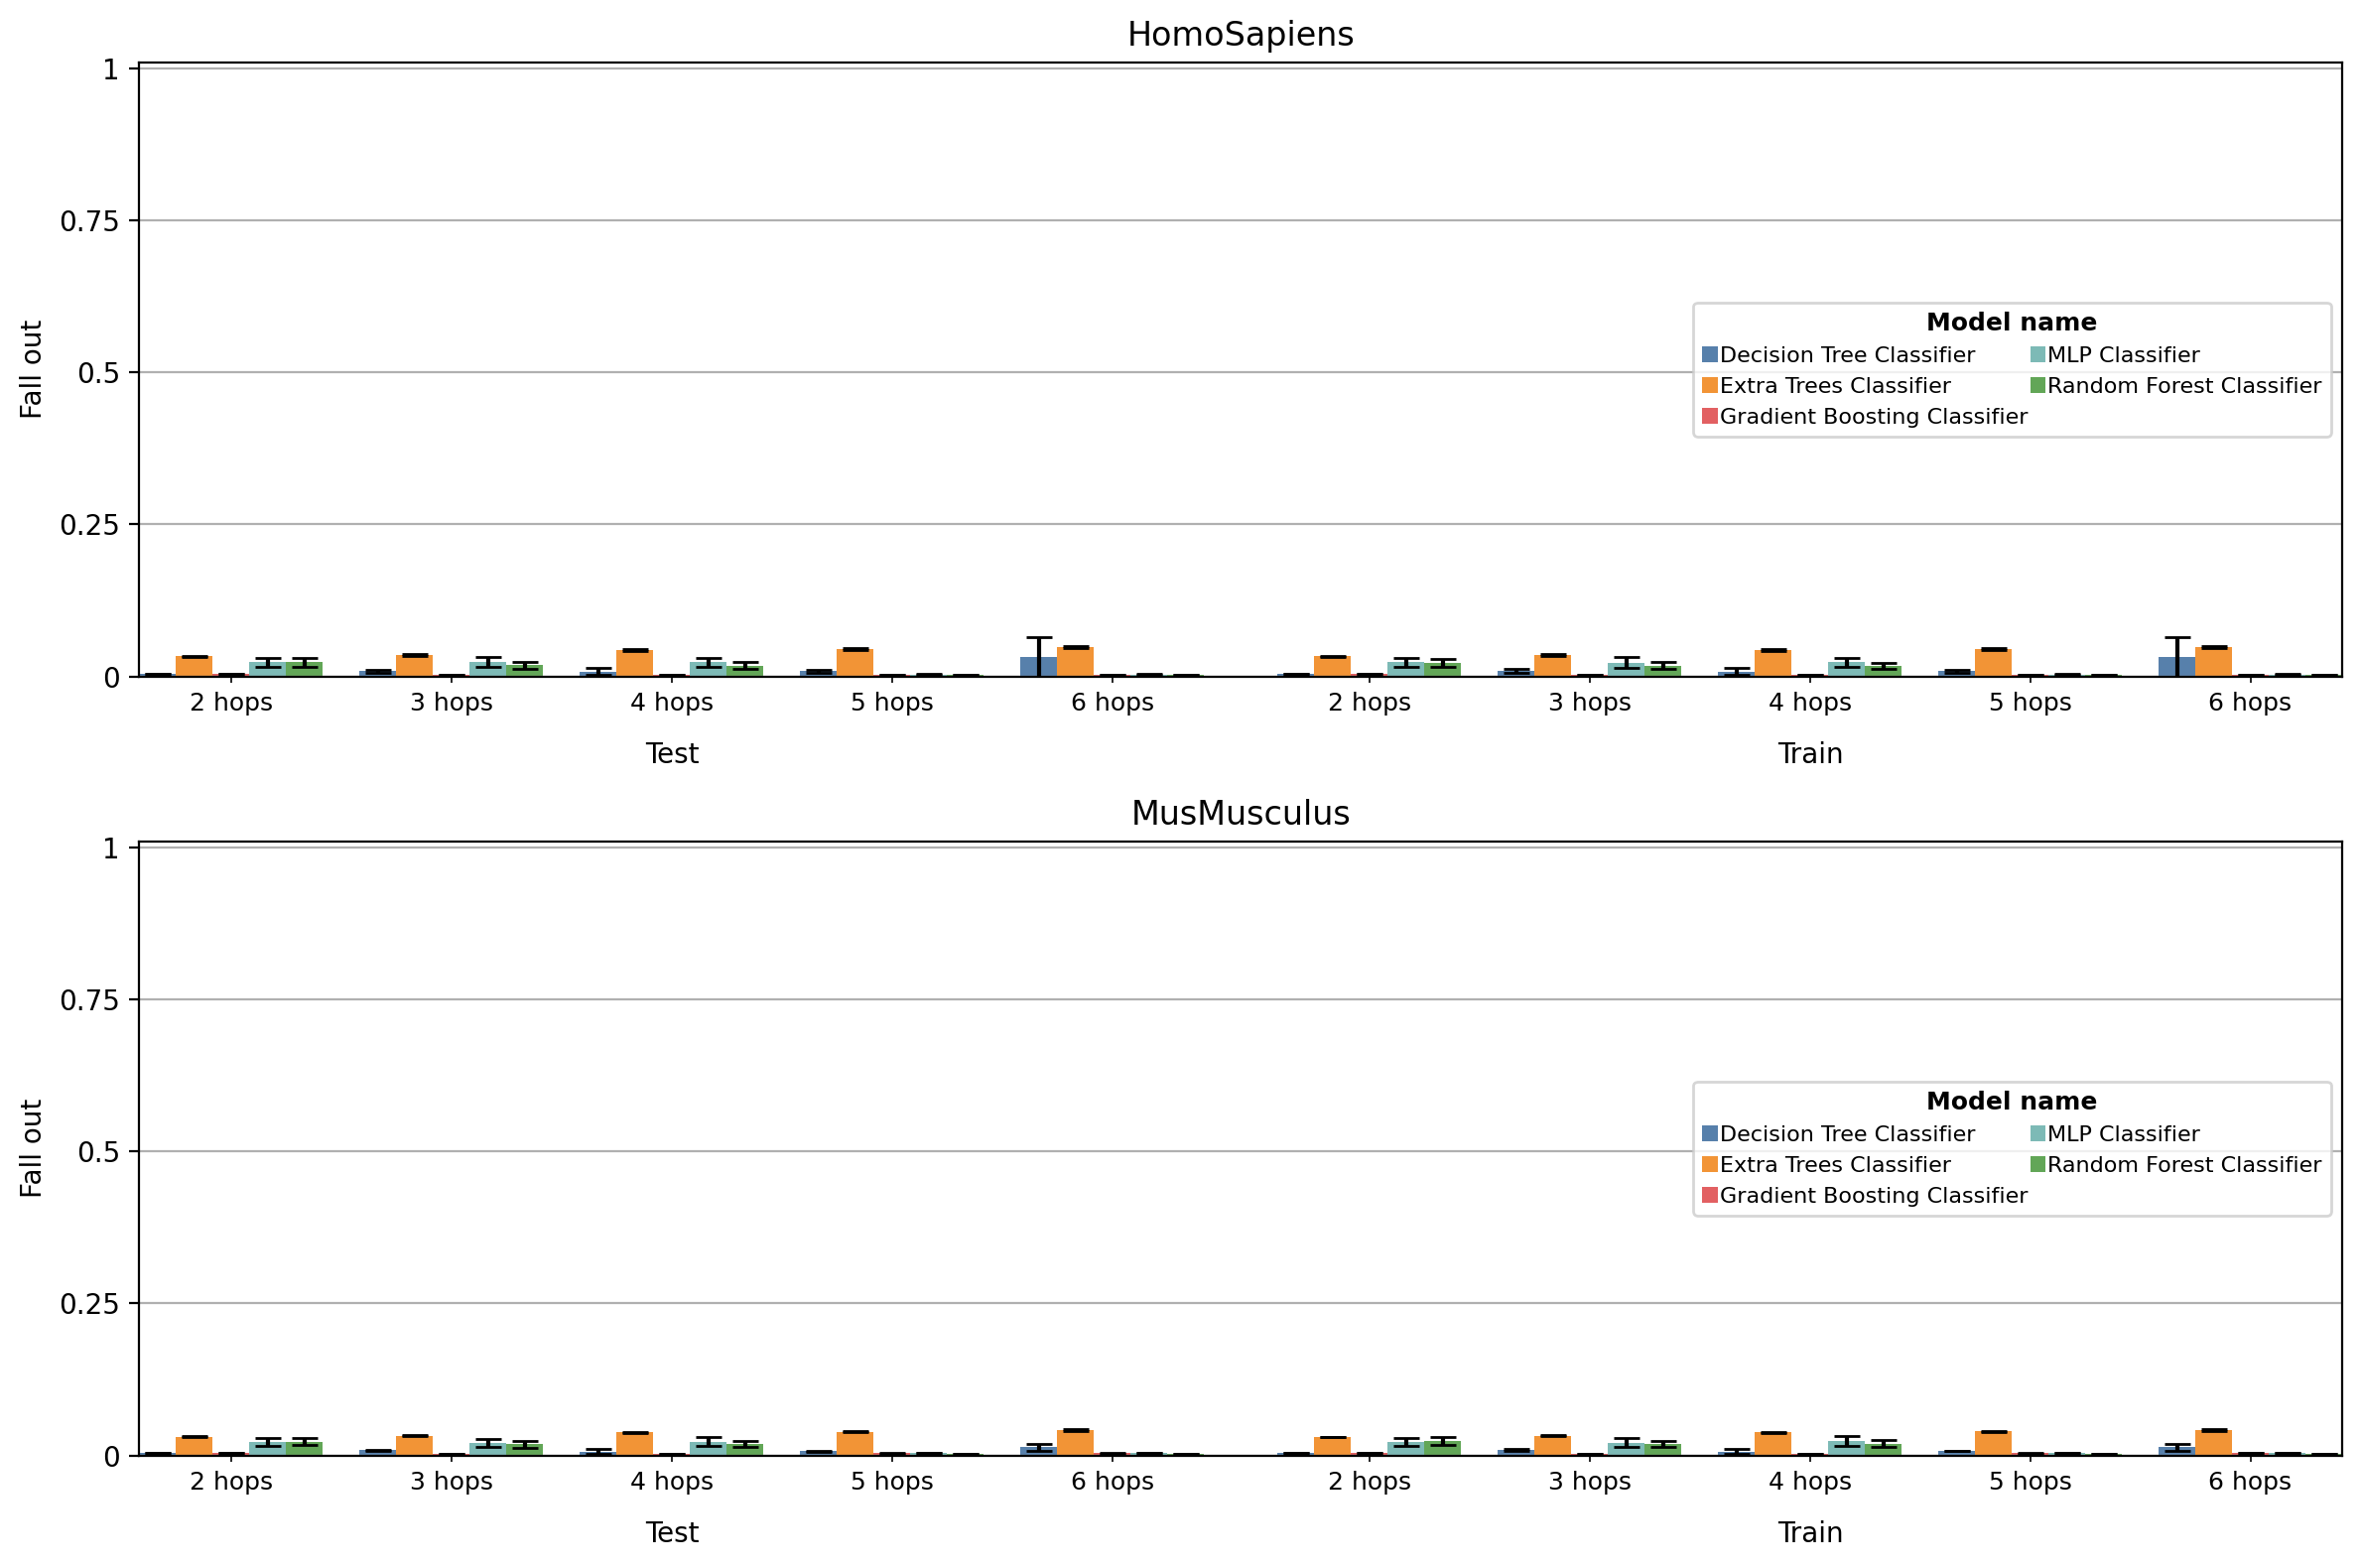

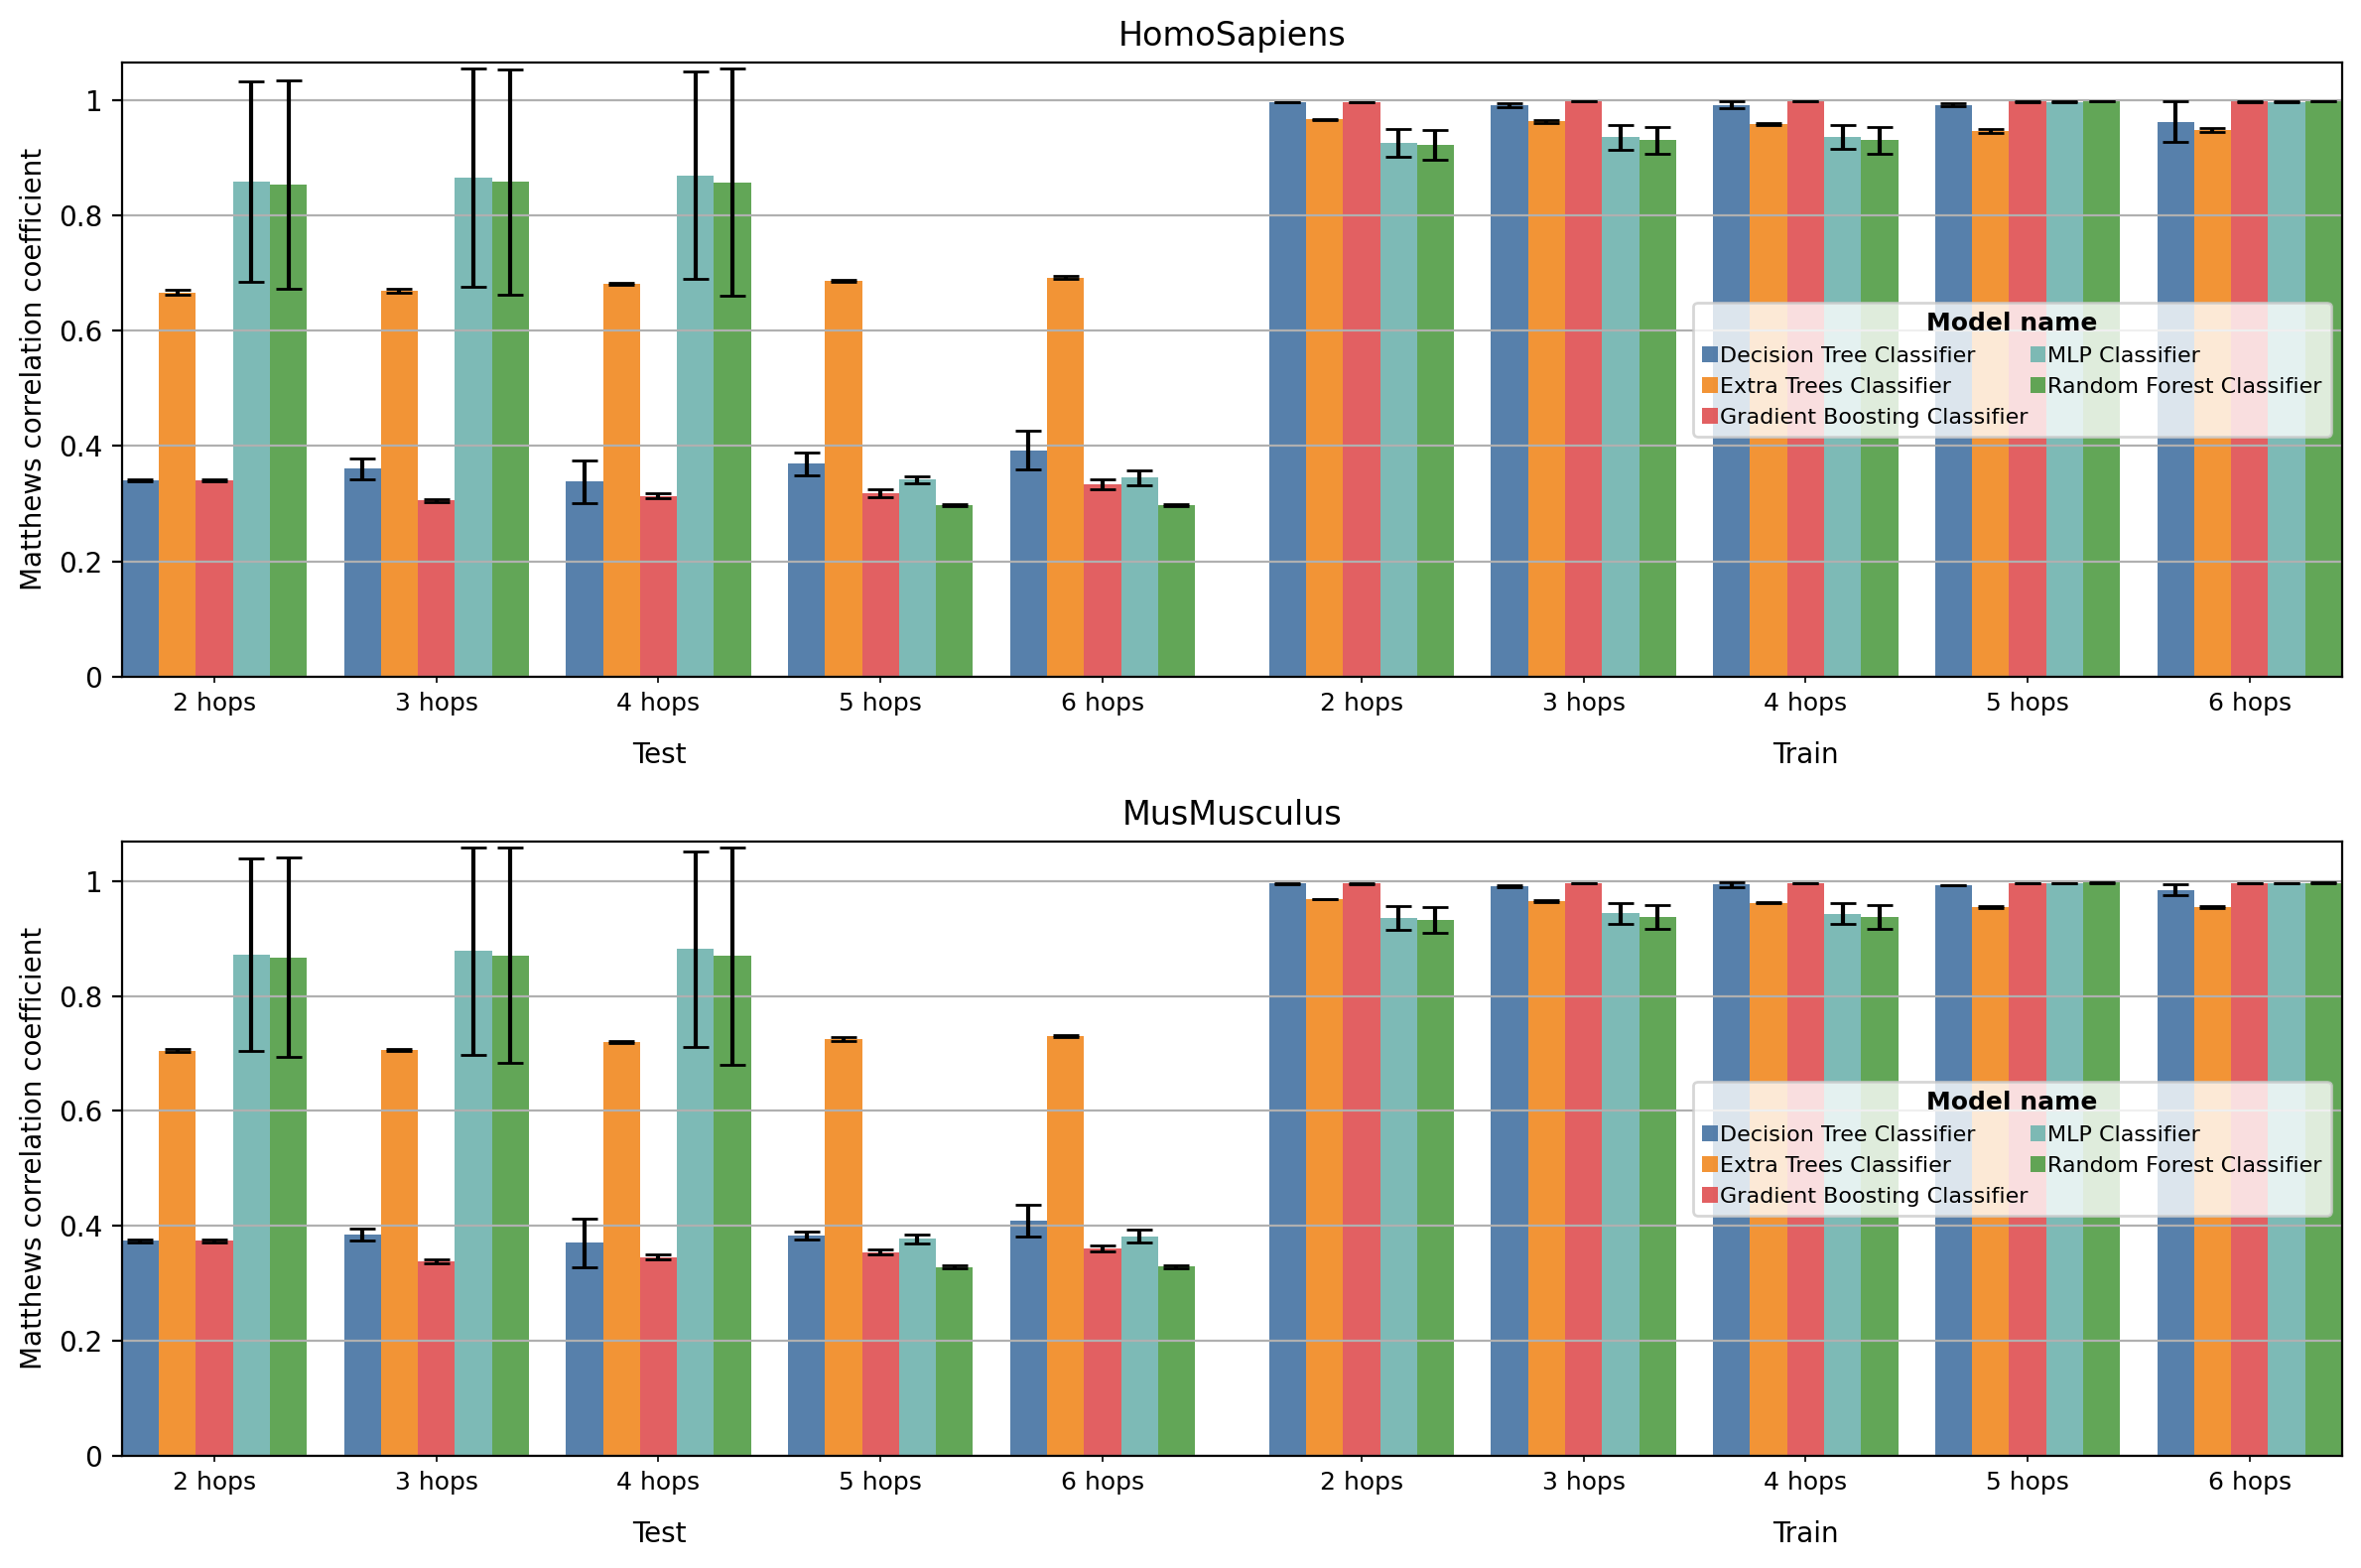

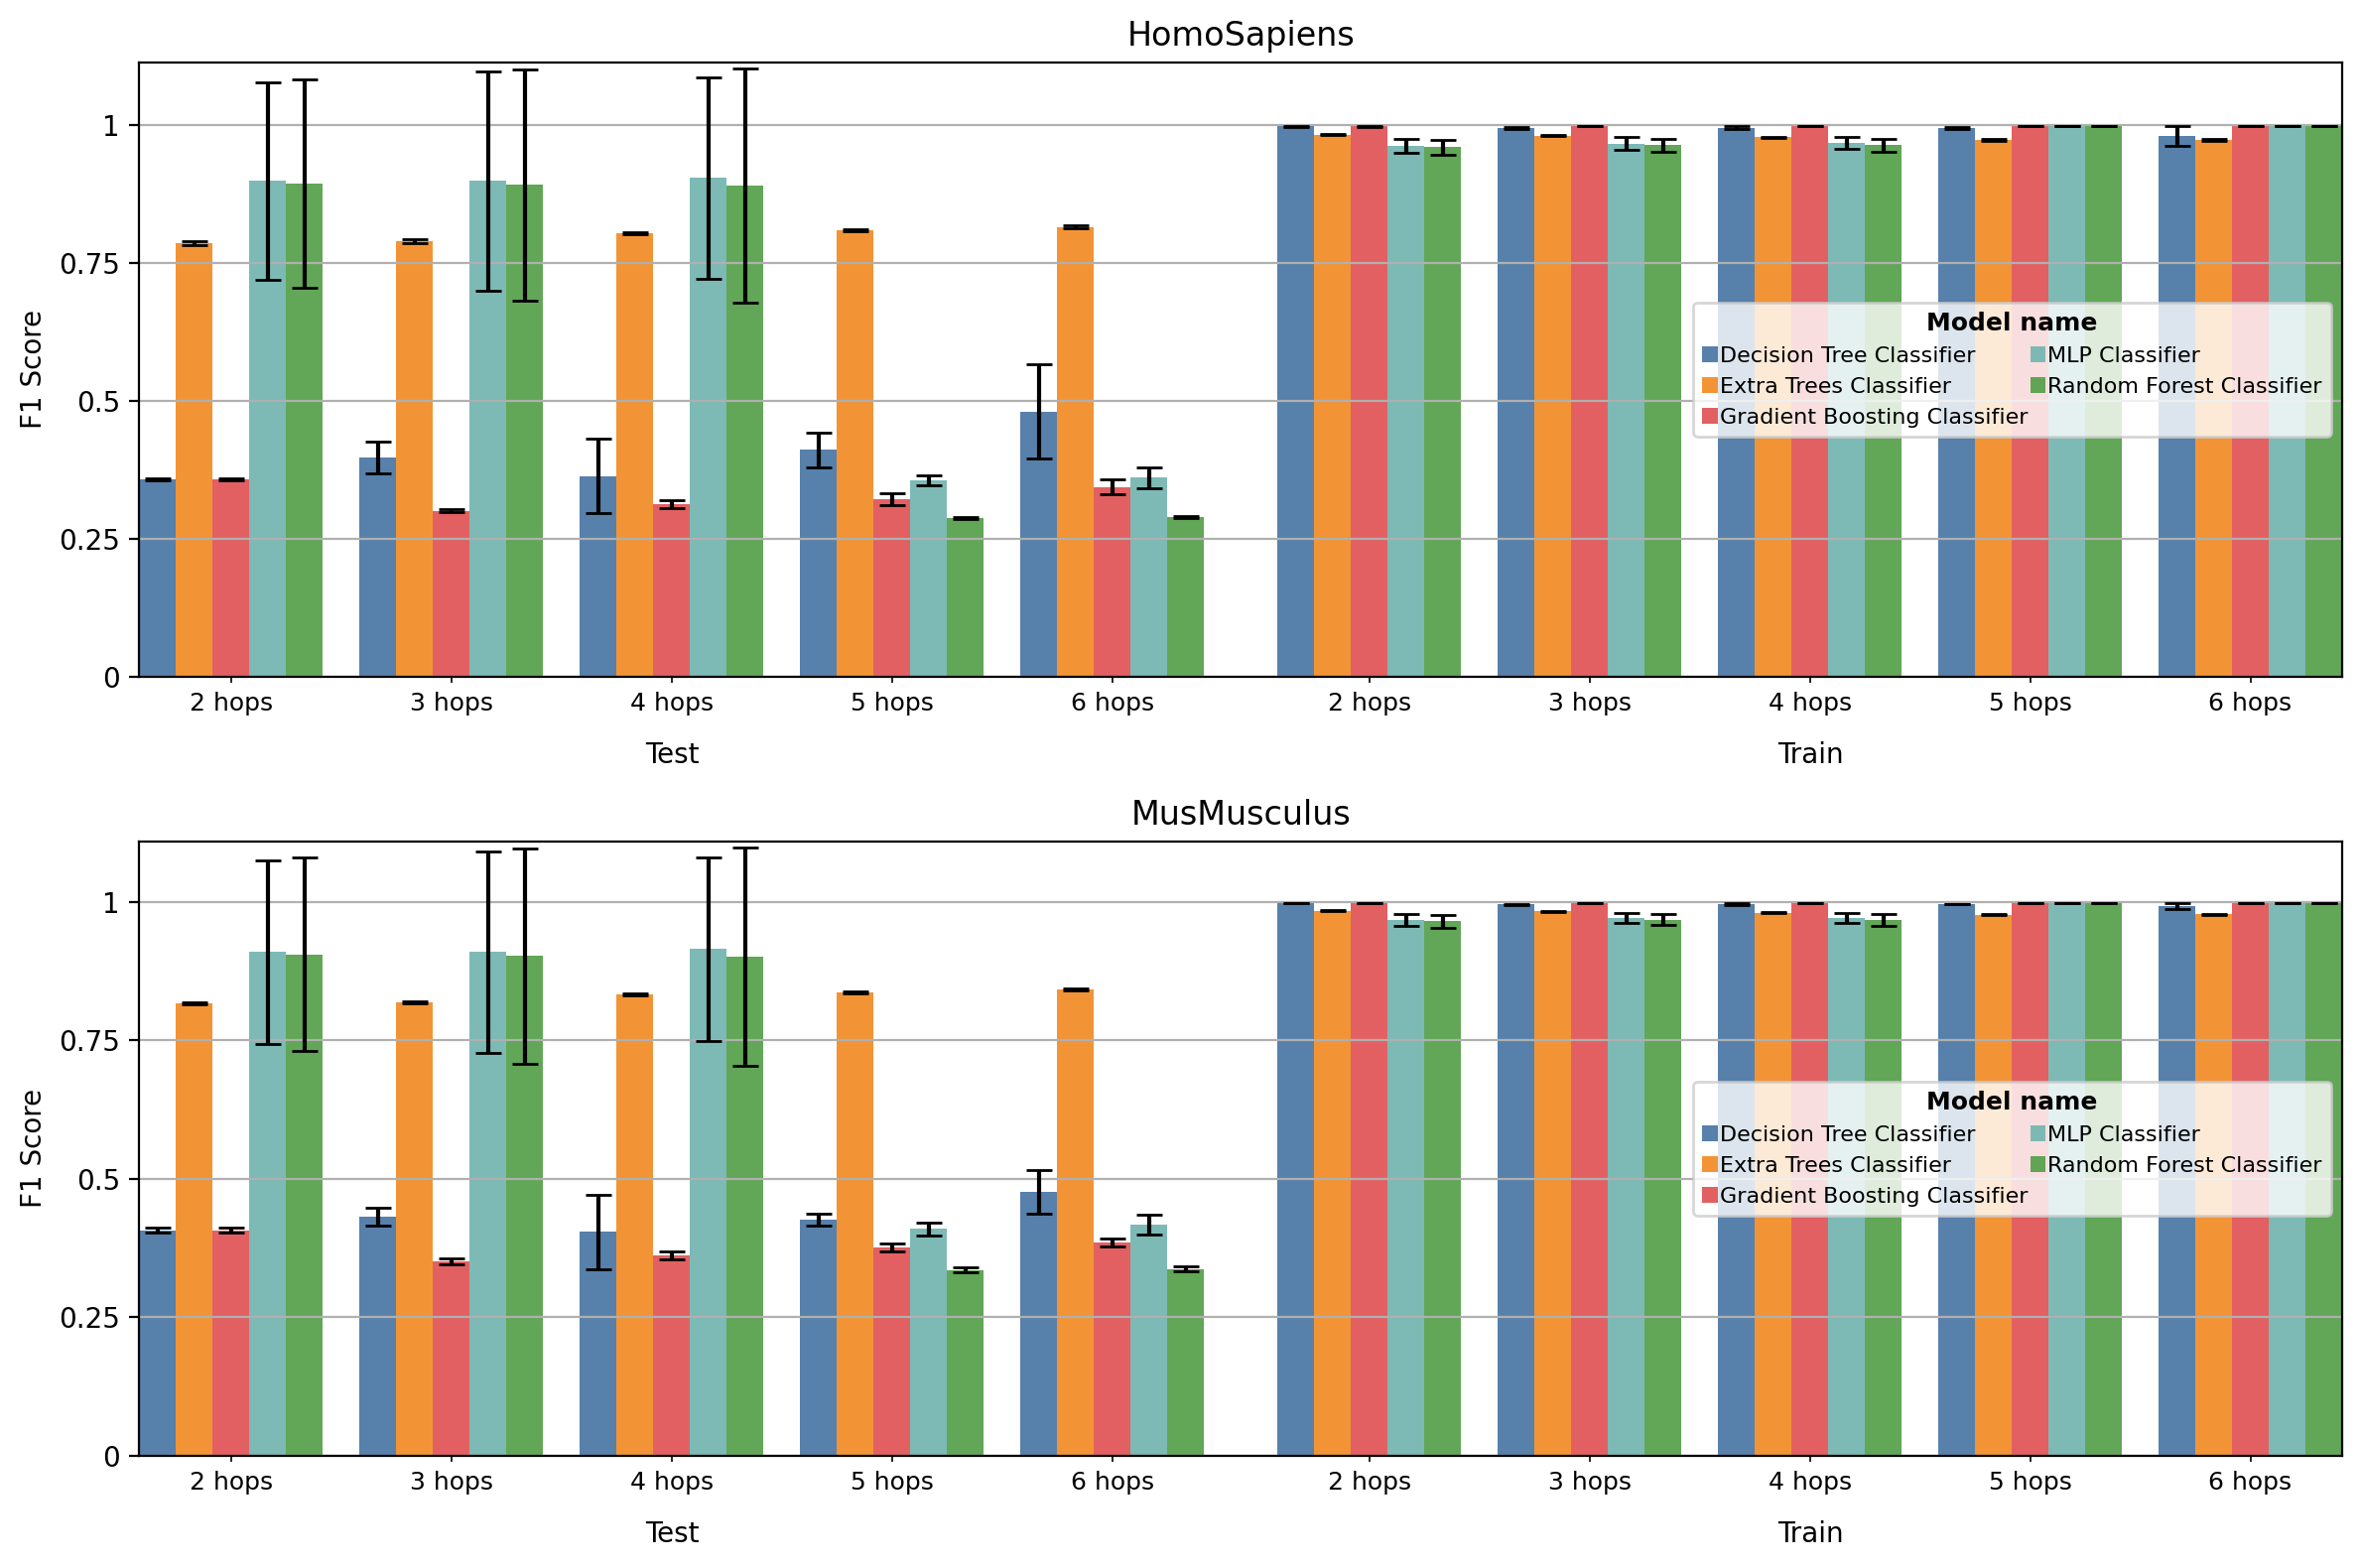

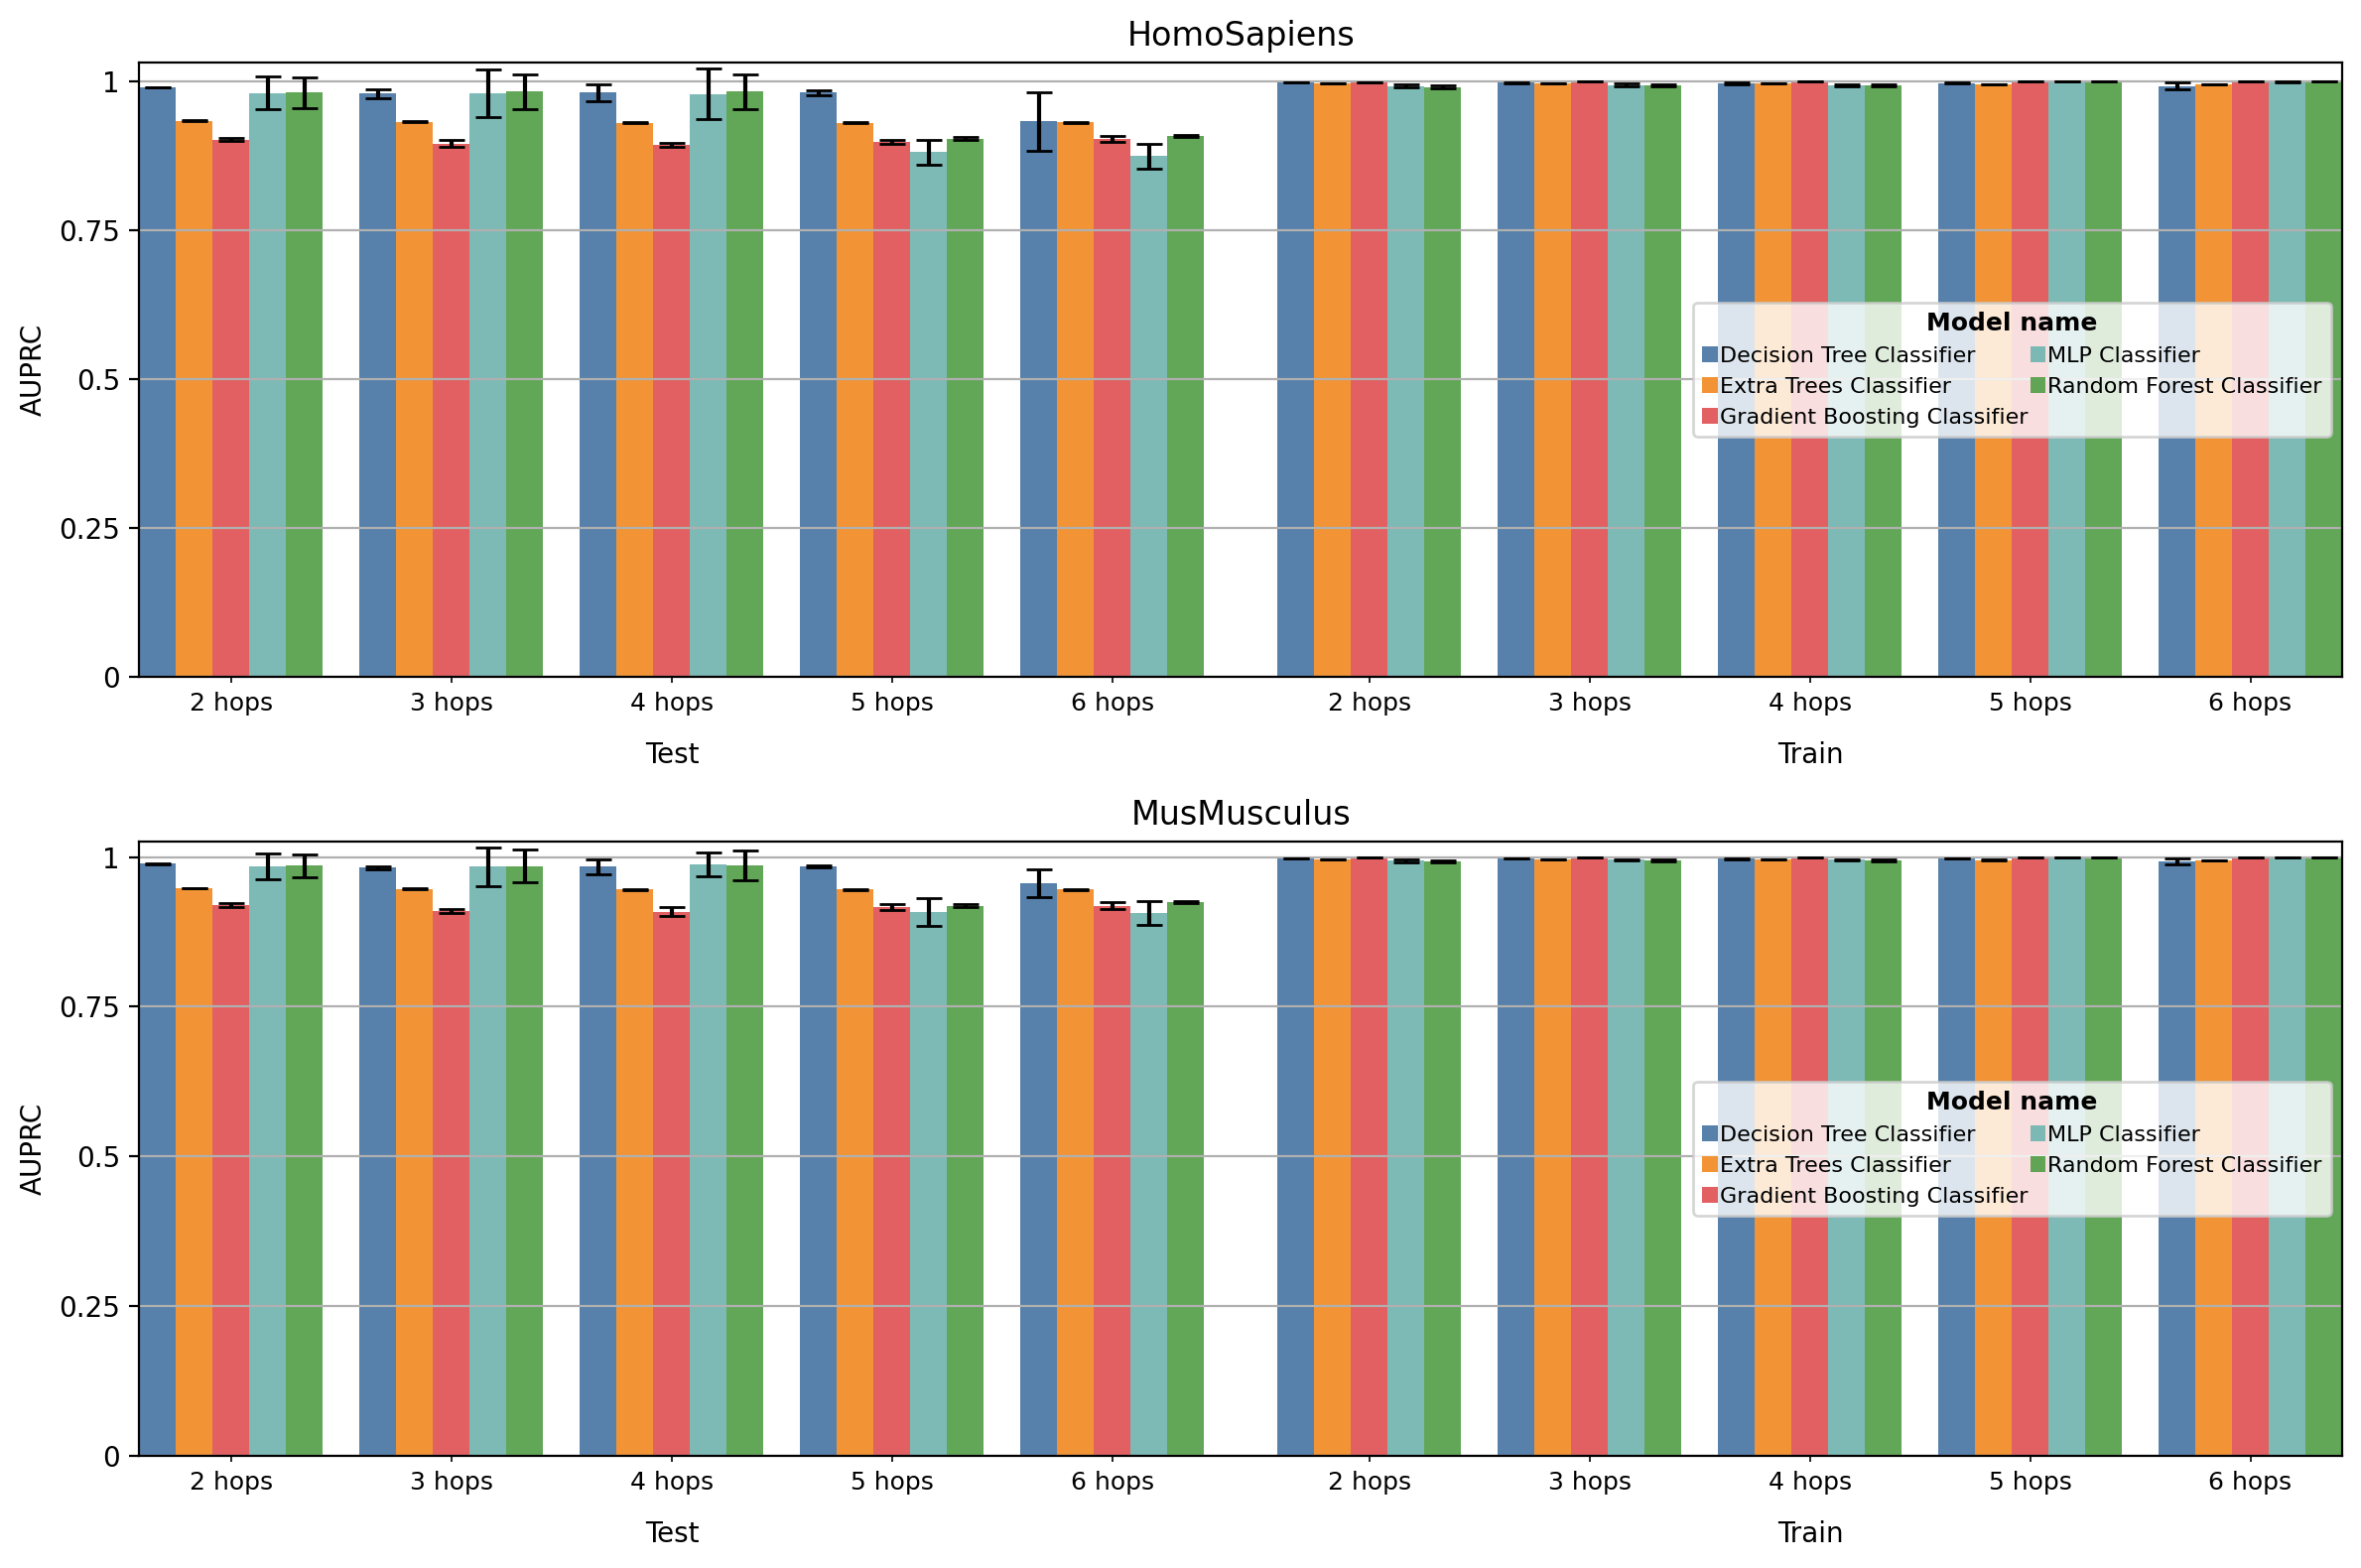

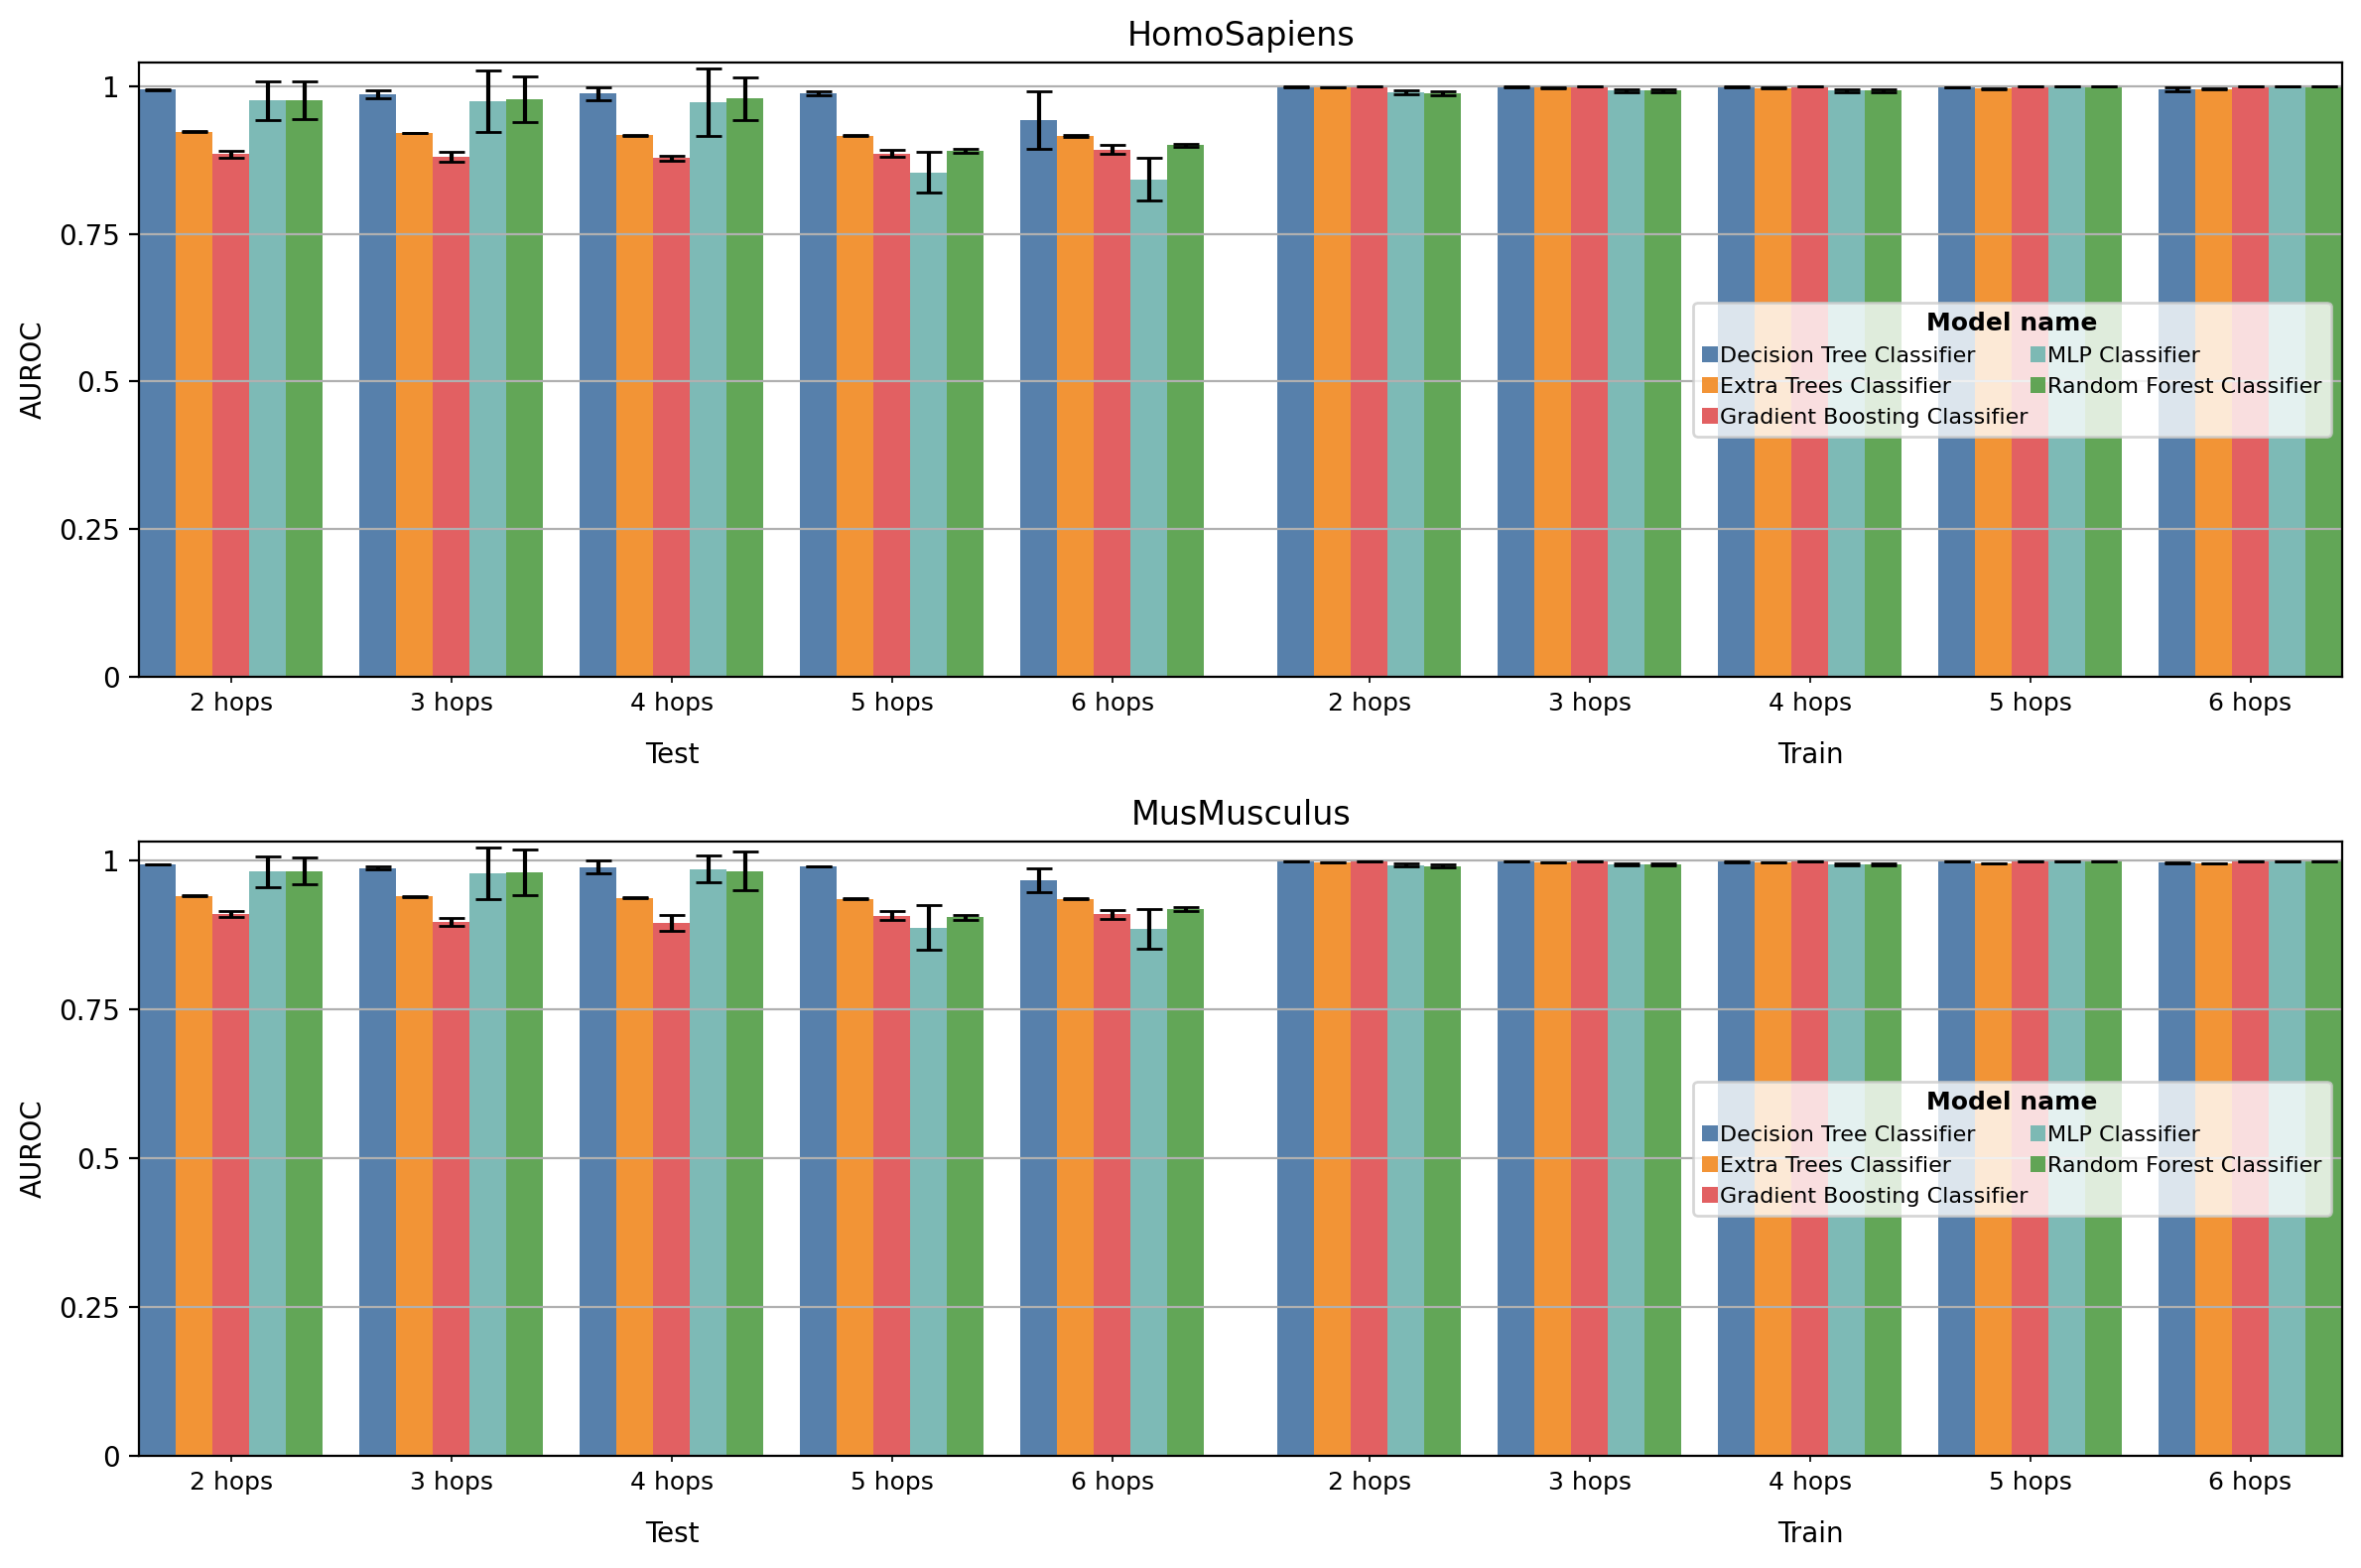

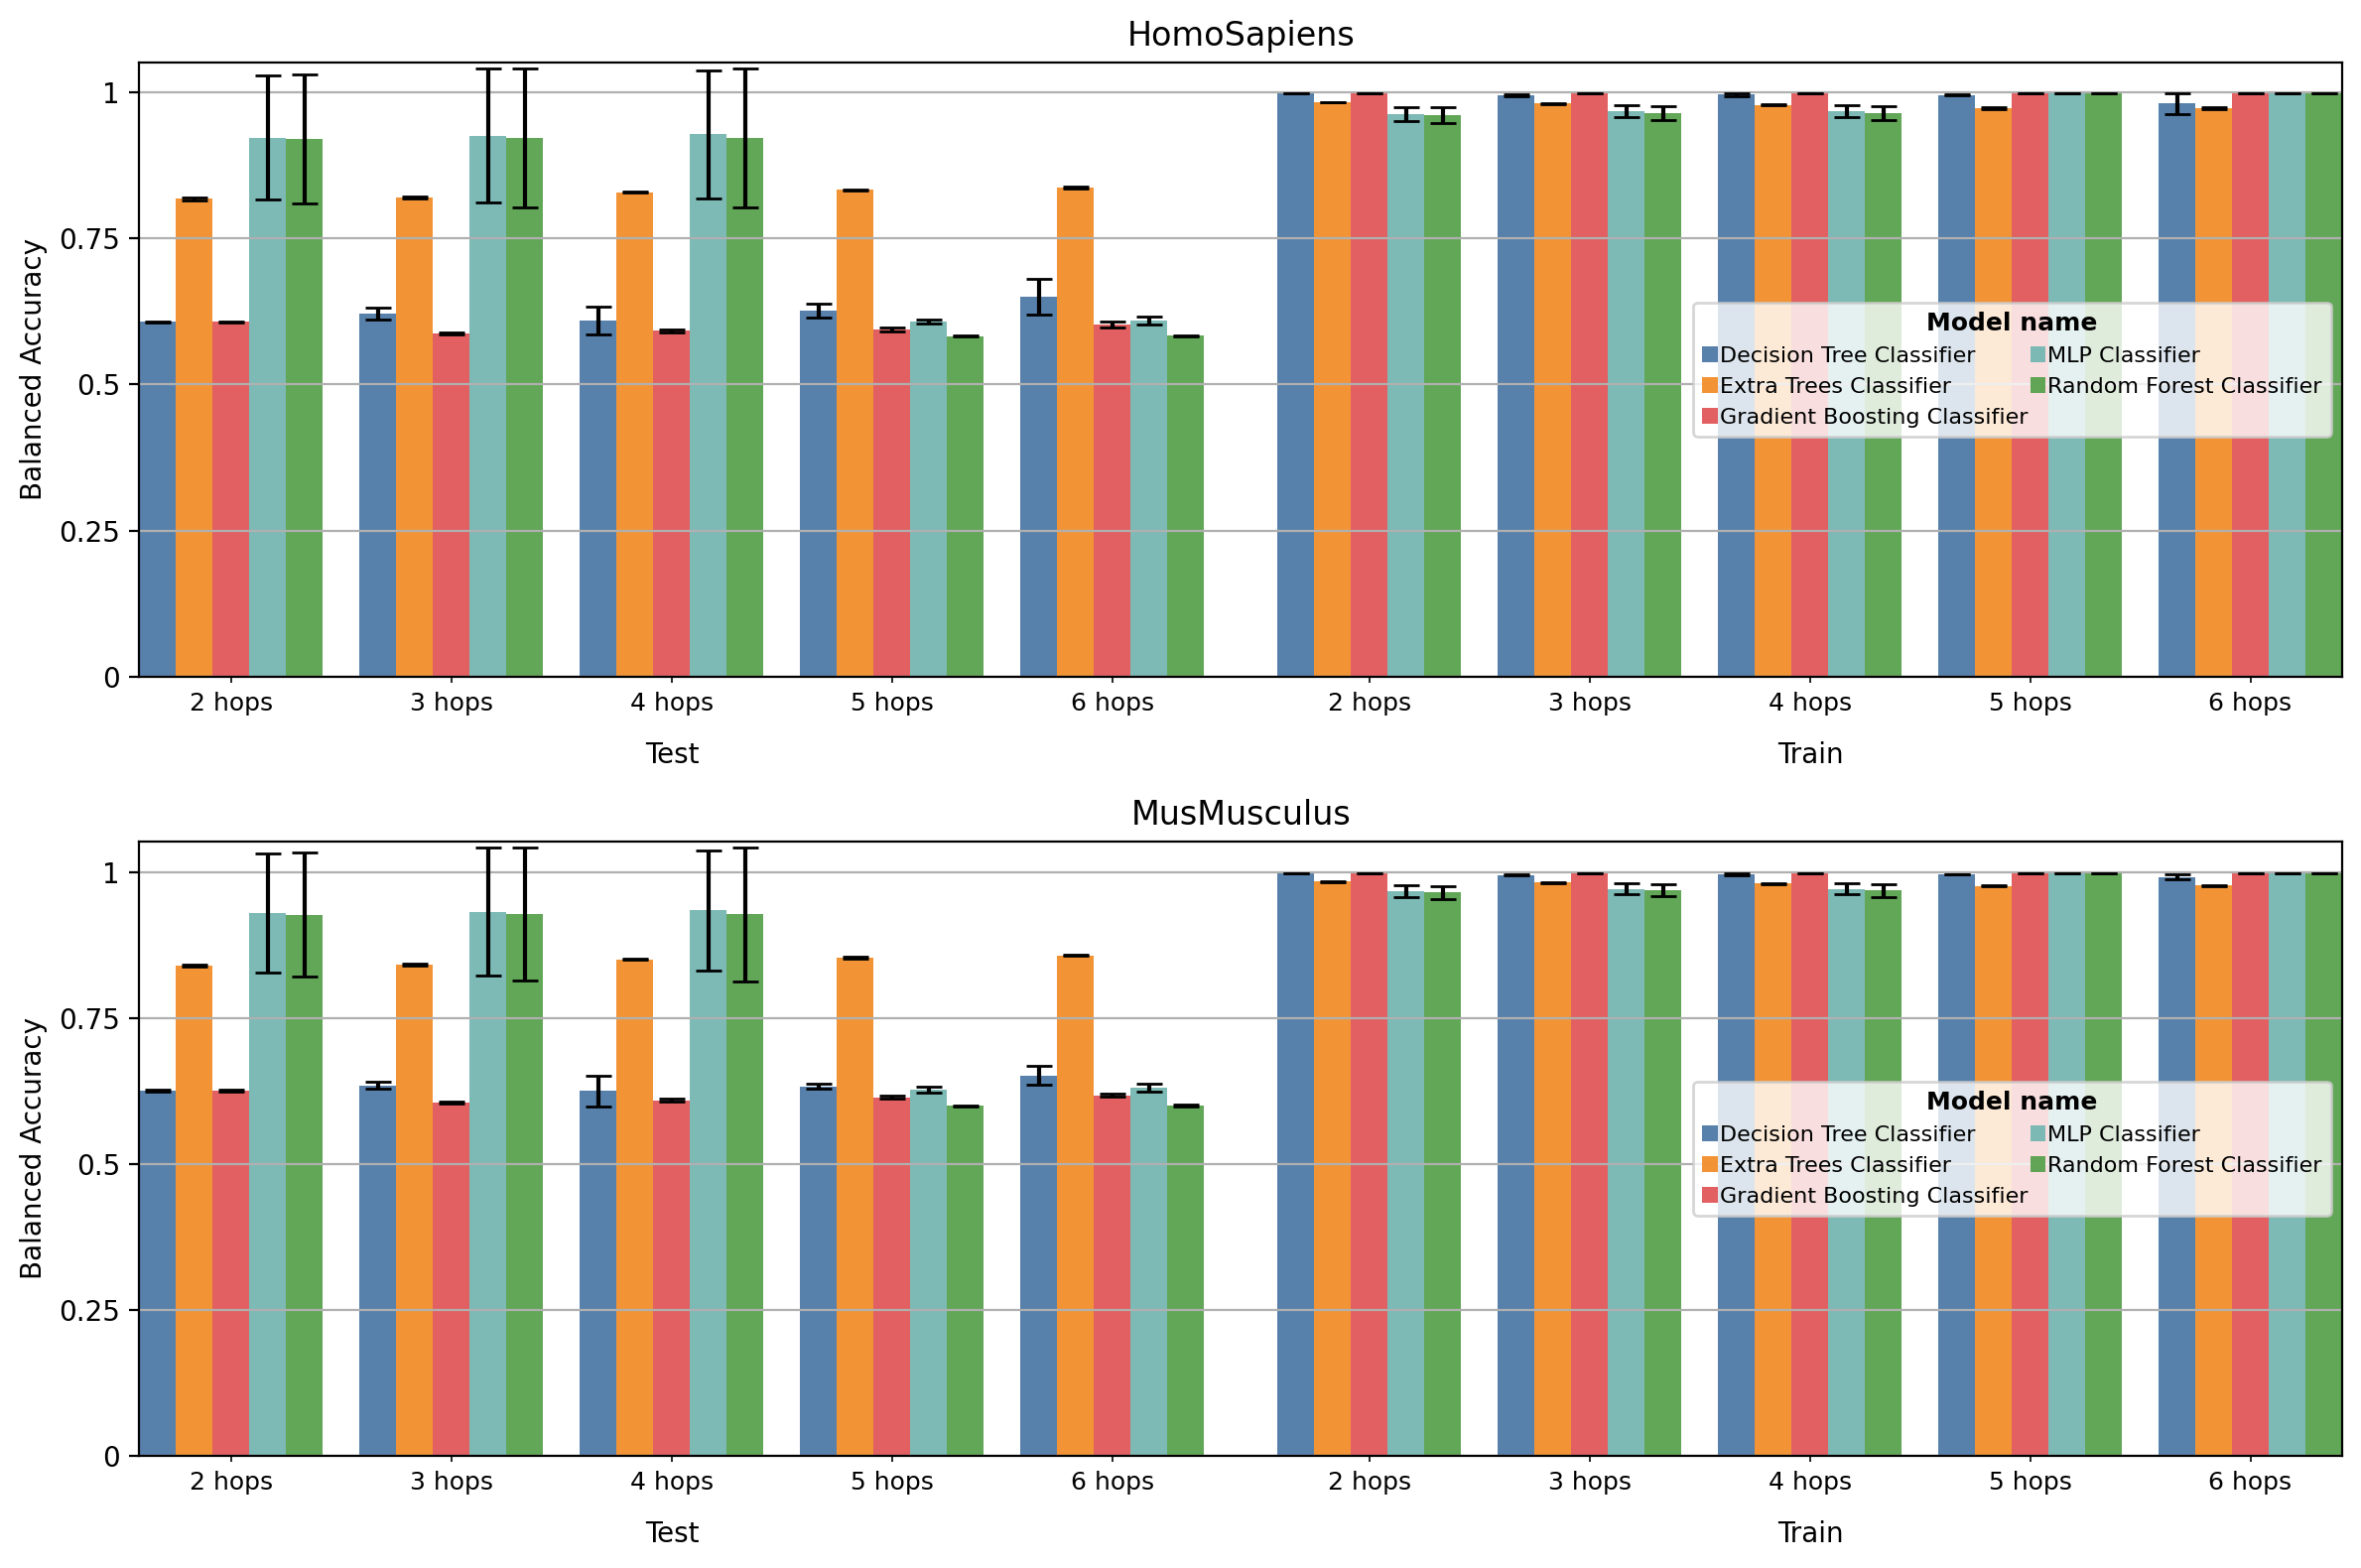

In [48]:
from barplots import barplots

results[('features_parameters', 'number_of_hops')] = [
    f"{hops} hops"
    for hops in results[('features_parameters', 'number_of_hops')]
]

index = ["graph_name", "evaluation_mode", ('features_parameters', 'number_of_hops'), "model_name"]

_ = barplots(
    results[[*index, "f1_score", "balanced_accuracy", "matthews_correlation_coefficient", "auroc", "auprc", "fall_out"]],
    groupby=index,
    height=4,
    bar_width=.2,
    unique_minor_labels=False,
    unique_major_labels=False,
    legend_position="center right",
    minor_rotation=0,
    ncol=2,
)

## Conclusions
In this tutorial, we have explored the concept of subgraph sketching as a method to compute edge embeddings for link prediction tasks. We have covered key topics such as the importance of graphs, edge prediction tasks, embeddings, and introduced GRAPE as a powerful library for subgraph sketching with high-performance capabilities.

We have discussed the significance of subgraph sketches and how they provide a summarized view of the local structural information surrounding each edge. By leveraging HyperLogLog counters, we can efficiently estimate the number of unique nodes within a specified neighborhood radius.

Furthermore, we have examined various Scikit-Learn models, including decision trees, random forests, extra trees, gradient boosting, and MLP, and demonstrated how they can be used in conjunction with subgraph sketching for accurate edge predictions.

We have also worked with the STRING PPI Homo Sapiens and STRING PPI Mus Musculus datasets, applying filtering to focus on higher-confidence interactions. Graph reporting and visualization techniques using GRAPE's Graph Visualizer have allowed us to gain insights into the underlying graph structures and the behavior of subgraph sketching features.

Additionally, we have set up the edge prediction evaluation pipeline from GRAPE, enabling us to assess the performance of the Scikit-Learn models for edge existence. We have explored different numbers of hops and fixed precision and bit settings to analyze the impact on prediction accuracy.

In future tutorials, we will continue to expand on the subgraph sketching methodology. We will explore the scalability of this implementation on very large graphs with billions of nodes and edges, showcasing the efficiency and performance of GRAPE. Additionally, we will delve into integrating these subgraph sketching features with the multi-modal graph neural networks available in GRAPE, allowing for more sophisticated modeling and prediction capabilities.

We invite you to explore GRAPE further, star the library on GitHub, and join the community of researchers and developers who are leveraging subgraph sketching for efficient and accurate graph analytics. With its powerful capabilities, GRAPE opens up new possibilities for graph analysis, link prediction, and other graph-related tasks.

[❤️ Help me write more tutorials & implement more advanced open-source Graph Machine Learning models by supporting my work on GitHub ❤️](https://github.com/sponsors/LucaCappelletti94)